<a href="https://colab.research.google.com/github/desstaw/Generating-Tabular-Data-using-LLMs-and-GANs/blob/main/Synthetic_Datasets_Analysis_HeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
url1 = 'https://raw.githubusercontent.com/desstaw/Generating-Tabular-Data-using-LLMs-and-GANs/main/heart_disease.csv'
heart = pd.read_csv(url1)

url2 = 'https://raw.githubusercontent.com/desstaw/Generating-Tabular-Data-using-LLMs-and-GANs/main/great_heart_disease.csv'
great_heart = pd.read_csv(url2)

url3 = 'https://raw.githubusercontent.com/desstaw/Generating-Tabular-Data-using-LLMs-and-GANs/main/great_custom_heart_disease.csv'
great_custom_heart = pd.read_csv(url3)

url4 = 'https://raw.githubusercontent.com/desstaw/Generating-Tabular-Data-using-LLMs-and-GANs/main/ctgans_heart_disease.csv'
ctgans_heart = pd.read_csv(url4)

In [ ]:
heart = heart.rename({'RestingBP': 'RestingBloodPressure', 'FastingBS': 'FastingBloodSugar',
'MaxHR': 'MaxHeartRate', 'ST_Slope': 'PeakExerciseSlope'
}, axis=1)

In [ ]:
heart = heart.astype({"FastingBloodSugar": str})
great_heart = great_heart.astype({"FastingBloodSugar": str})
great_custom_heart = great_custom_heart.astype({"FastingBloodSugar": str})
ctgans_heart = ctgans_heart.astype({"FastingBloodSugar": str})

In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   918 non-null    int64  
 1   Sex                   918 non-null    object 
 2   ChestPainType         918 non-null    object 
 3   RestingBloodPressure  918 non-null    int64  
 4   Cholesterol           918 non-null    int64  
 5   FastingBloodSugar     918 non-null    object 
 6   RestingECG            918 non-null    object 
 7   MaxHeartRate          918 non-null    int64  
 8   ExerciseAngina        918 non-null    object 
 9   Oldpeak               918 non-null    float64
 10  PeakExerciseSlope     918 non-null    object 
 11  HeartDisease          918 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 86.2+ KB


In [ ]:
#great_stroke = great_stroke.drop("id", axis=1)
#great_custom_stroke = great_custom_stroke.drop("id", axis=1)
#stroke = stroke.drop("id", axis=1)
#ctgans_hepatitisC = ctgans_hepatitisC.drop("Unnamed: 0", axis=1)

In [ ]:
# Define sensitive attribute and target variable
sensitive_attribute = 'Sex'
target_variable = 'HeartDisease'

## Fairness comparison between the original and th3 synthetic datasets

In [ ]:
from scipy import stats

# Calculate Statistical Parity for Sex
def statistical_parity(data, protected_attr, target_attr):
    crosstab = pd.crosstab(data[protected_attr], data[target_attr])
    chi2, p, _, _ = stats.chi2_contingency(crosstab)
    return chi2, p

# Calculate Disparate Impact for Sex
def disparate_impact(data, protected_attr, target_attr):
    crosstab = pd.crosstab(data[protected_attr], data[target_attr])
    impact = crosstab.min(axis=0) / crosstab.max(axis=0)
    return impact

# Calculate fairness metrics for BE-GET and CTGAN datasets
chi2_beget, p_original = statistical_parity(heart, sensitive_attribute, target_variable)
impact_original = disparate_impact(heart, sensitive_attribute, target_variable)

chi2_ctgan, p_great = statistical_parity(great_heart, sensitive_attribute, target_variable)
impact_great = disparate_impact(great_heart, sensitive_attribute, target_variable)

chi2_ctgan, p_great_custom = statistical_parity(great_custom_heart, sensitive_attribute, target_variable)
impact_great_custom = disparate_impact(great_custom_heart, sensitive_attribute, target_variable)

chi2_ctgan, p_ctgans = statistical_parity(ctgans_heart, sensitive_attribute, target_variable)
impact_ctgans = disparate_impact(ctgans_heart, sensitive_attribute, target_variable)

print("Fairness Metrics for Original dataset:")
print(f"Statistical Parity (Chi-Squared Test p-value): {p_original}")
print(f"Disparate Impact: {impact_original}\n")

print("Fairness Metrics for be-great:")
print(f"Statistical Parity (Chi-Squared Test p-value): {p_great}")
print(f"Disparate Impact: {impact_great}\n")

print("Fairness Metrics for be-great with constrains:")
print(f"Statistical Parity (Chi-Squared Test p-value): {p_great_custom}")
print(f"Disparate Impact: {impact_great_custom}\n")

print("Fairness Metrics for CTGANs:")
print(f"Statistical Parity (Chi-Squared Test p-value): {p_ctgans}")
print(f"Disparate Impact: {impact_ctgans}\n")

Fairness Metrics for Original dataset:
Statistical Parity (Chi-Squared Test p-value): 4.597617450809164e-20
Disparate Impact: HeartDisease
0    0.535581
1    0.109170
dtype: float64

Fairness Metrics for be-great:
Statistical Parity (Chi-Squared Test p-value): 1.4405675380210632e-28
Disparate Impact: HeartDisease
Absent     0.404930
Present    0.029703
dtype: float64

Fairness Metrics for be-great with constrains:
Statistical Parity (Chi-Squared Test p-value): 2.798072943849584e-25
Disparate Impact: HeartDisease
Absent     0.396491
Present    0.039920
dtype: float64

Fairness Metrics for CTGANs:
Statistical Parity (Chi-Squared Test p-value): 0.11236502318736809
Disparate Impact: HeartDisease
Absent     0.218659
Present    0.288660
dtype: float64



In [ ]:
great_custom_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919 entries, 0 to 918
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   919 non-null    float64
 1   Sex                   919 non-null    object 
 2   ChestPainType         919 non-null    object 
 3   RestingBloodPressure  919 non-null    float64
 4   Cholesterol           919 non-null    float64
 5   FastingBloodSugar     919 non-null    object 
 6   RestingECG            919 non-null    object 
 7   MaxHeartRate          919 non-null    float64
 8   ExerciseAngina        919 non-null    object 
 9   Oldpeak               919 non-null    float64
 10  PeakExerciseSlope     919 non-null    object 
 11  HeartDisease          919 non-null    object 
dtypes: float64(5), object(7)
memory usage: 86.3+ KB


## Classification

In [ ]:
!pip install catboost
!pip install fairlearn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from catboost import CatBoostClassifier

# Define a function for classification
def classify_dataset(dataset, sensitive_attribute, target_variable):

    sensitive_attribute = 'Sex'
    target_variable = 'HeartDisease'

    # Split data into features and labels
    X = dataset.drop(columns=[target_variable])
    y = dataset[target_variable]


    #sensitive_attribute = 'Sex'
    #target_variable = 'Category'

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Convert categorical features to strings
    categorical_features_indices = X.select_dtypes(include=['object']).columns


    # Initialize the CatBoostClassifier
    catboost_model = CatBoostClassifier(iterations=200, depth=6, learning_rate=0.1, random_state=42, cat_features=list(categorical_features_indices))

    # Train the model on the training data
    catboost_model.fit(X_train, y_train, cat_features=list(categorical_features_indices))

    # Predict on the testing data
    y_pred = catboost_model.predict(X_test)

    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    classification_metrics = classification_report(y_test, y_pred)

    #print('heeeyyyyy',len(y_test)) #132
    #print(len(y_pred))

    return accuracy, classification_metrics, y_pred, y_test


# Classify each dataset
# Classify each dataset and obtain predictions
accuracy_original, metrics_original, y_pred_original, y_test_original = classify_dataset(heart, sensitive_attribute, target_variable)
accuracy_synthetic1, metrics_synthetic1, y_pred_synthetic1, y_test_synthetic1 = classify_dataset(great_heart, sensitive_attribute, target_variable)
accuracy_synthetic2, metrics_synthetic2, y_pred_synthetic2, y_test_synthetic2 = classify_dataset(great_custom_heart, sensitive_attribute, target_variable)
accuracy_synthetic3, metrics_synthetic3, y_pred_synthetic3, y_test_synthetic3 = classify_dataset(ctgans_heart, sensitive_attribute, target_variable)




# Print classification results (continued)
print("Classification Results (Original Dataset):")
print(f"Accuracy: {accuracy_original}")
print("Classification Metrics:")
print(metrics_original)

print("Classification Results (be-GReaT):")
print(f"Accuracy: {accuracy_synthetic1}")
print("Classification Metrics:")
print(metrics_synthetic1)

print("Classification Results (be-GReaT with constrain):")
print(f"Accuracy: {accuracy_synthetic2}")
print("Classification Metrics:")
print(metrics_synthetic2)


print("Classification Results CTGANs):")
print(f"Accuracy: {accuracy_synthetic3}")
print("Classification Metrics:")
print(metrics_synthetic3)

0:	learn: 0.6153624	total: 53.4ms	remaining: 10.6s
1:	learn: 0.5540958	total: 62ms	remaining: 6.14s
2:	learn: 0.4973627	total: 69ms	remaining: 4.53s
3:	learn: 0.4579858	total: 76.5ms	remaining: 3.75s
4:	learn: 0.4414477	total: 80.4ms	remaining: 3.13s
5:	learn: 0.4142811	total: 84.9ms	remaining: 2.74s
6:	learn: 0.3935692	total: 95.5ms	remaining: 2.63s
7:	learn: 0.3712020	total: 103ms	remaining: 2.48s
8:	learn: 0.3614560	total: 106ms	remaining: 2.24s
9:	learn: 0.3463388	total: 112ms	remaining: 2.13s
10:	learn: 0.3336092	total: 118ms	remaining: 2.03s
11:	learn: 0.3289434	total: 130ms	remaining: 2.03s
12:	learn: 0.3139322	total: 136ms	remaining: 1.96s
13:	learn: 0.3047711	total: 143ms	remaining: 1.9s
14:	learn: 0.2982564	total: 147ms	remaining: 1.81s
15:	learn: 0.2921665	total: 153ms	remaining: 1.76s
16:	learn: 0.2860847	total: 161ms	remaining: 1.73s
17:	learn: 0.2833736	total: 168ms	remaining: 1.7s
18:	learn: 0.2776564	total: 175ms	remaining: 1.67s
19:	learn: 0.2715863	total: 180ms	remain

## Classification fairness comparison

In [ ]:
from sklearn.metrics import confusion_matrix

def calculate_fairness_metrics( y_true, y_pred, sensitive_attribute):
    # Create a confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Extract TP, FP, TN, FN
    TP = cm[1, 1]
    FP = cm[0, 1]
    TN = cm[0, 0]
    FN = cm[1, 0]

    # False Positive Rate (FPR)
    fpr = FP / (FP + TN)

    # False Negative Rate (FNR)
    fnr = FN / (FN + TP)

    # Selection Rate (SR)
    sr = (TP + FP) / (TP + FP + TN + FN)

    # Demographic Parity (DP)
    dp = abs(fpr - fnr)

    return fpr, fnr, sr, dp


# Calculate fairness metrics for each dataset
fpr_original, fnr_original, sr_original, dp_original = calculate_fairness_metrics(y_test_original, y_pred_original, sensitive_attribute)

# Calculate fairness metrics for the synthetic dataset 1
fpr_synthetic1, fnr_synthetic1, sr_synthetic1, dp_synthetic1 = calculate_fairness_metrics(y_test_synthetic1, y_pred_synthetic1, sensitive_attribute)

# Calculate fairness metrics for the synthetic dataset 2
fpr_synthetic2, fnr_synthetic2, sr_synthetic2, dp_synthetic2 = calculate_fairness_metrics(y_test_synthetic2, y_pred_synthetic2, sensitive_attribute)

# Calculate fairness metrics for the synthetic dataset 3
fpr_synthetic3, fnr_synthetic3, sr_synthetic3, dp_synthetic3 = calculate_fairness_metrics(y_test_synthetic3, y_pred_synthetic3, sensitive_attribute)

# Print fairness metrics
print("Fairness Metrics for Heart Disease Dataset:")
print(f"False Positive Rate (FPR): {fpr_original}")
print(f"False Negative Rate (FNR): {fnr_original}")
print(f"Selection Rate (SR): {sr_original}")
print(f"Demographic Parity (DP): {dp_original}")

print("\nFairness Metrics for be-GReaT Heart Disease:")
print(f"False Positive Rate (FPR): {fpr_synthetic1}")
print(f"False Negative Rate (FNR): {fnr_synthetic1}")
print(f"Selection Rate (SR): {sr_synthetic1}")
print(f"Demographic Parity (DP): {dp_synthetic1}")

print("\nFairness Metrics for be-GReaT Heart Disease with constrains:")
print(f"False Positive Rate (FPR): {fpr_synthetic2}")
print(f"False Negative Rate (FNR): {fnr_synthetic2}")
print(f"Selection Rate (SR): {sr_synthetic2}")
print(f"Demographic Parity (DP): {dp_synthetic2}")

print("\nFairness Metrics for CTGANs Heart Disease:")
print(f"False Positive Rate (FPR): {fpr_synthetic3}")
print(f"False Negative Rate (FNR): {fnr_synthetic3}")
print(f"Selection Rate (SR): {sr_synthetic3}")
print(f"Demographic Parity (DP): {dp_synthetic3}")

Fairness Metrics for Heart Disease Dataset:
False Positive Rate (FPR): 0.1038961038961039
False Negative Rate (FNR): 0.102803738317757
Selection Rate (SR): 0.5652173913043478
Demographic Parity (DP): 0.001092365578346896

Fairness Metrics for be-GReaT Heart Disease:
False Positive Rate (FPR): 0.1
False Negative Rate (FNR): 0.009615384615384616
Selection Rate (SR): 0.6032608695652174
Demographic Parity (DP): 0.0903846153846154

Fairness Metrics for be-GReaT Heart Disease with constrains:
False Positive Rate (FPR): 0.024691358024691357
False Negative Rate (FNR): 0.07766990291262135
Selection Rate (SR): 0.5271739130434783
Demographic Parity (DP): 0.052978544887929996

Fairness Metrics for CTGANs Heart Disease:
False Positive Rate (FPR): 0.6
False Negative Rate (FNR): 0.44954128440366975
Selection Rate (SR): 0.5706521739130435
Demographic Parity (DP): 0.15045871559633023


##Data Quality

In [ ]:
#!pip install table-evaluator

###hepatitisC vs great_hepatitisC

In [ ]:
heart = heart.astype({"FastingBloodSugar": str})
heart = heart.astype({"FastingBloodSugar": str})
heart = heart.astype({"FastingBloodSugar": str})
heart = heart.astype({"FastingBloodSugar": str})

In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   918 non-null    int64  
 1   Sex                   918 non-null    object 
 2   ChestPainType         918 non-null    object 
 3   RestingBloodPressure  918 non-null    int64  
 4   Cholesterol           918 non-null    int64  
 5   FastingBloodSugar     918 non-null    object 
 6   RestingECG            918 non-null    object 
 7   MaxHeartRate          918 non-null    int64  
 8   ExerciseAngina        918 non-null    object 
 9   Oldpeak               918 non-null    float64
 10  PeakExerciseSlope     918 non-null    object 
 11  HeartDisease          918 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 86.2+ KB


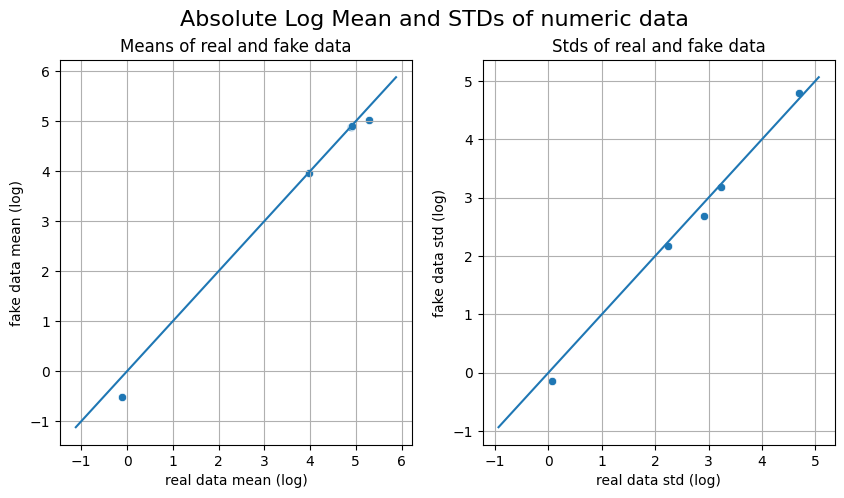

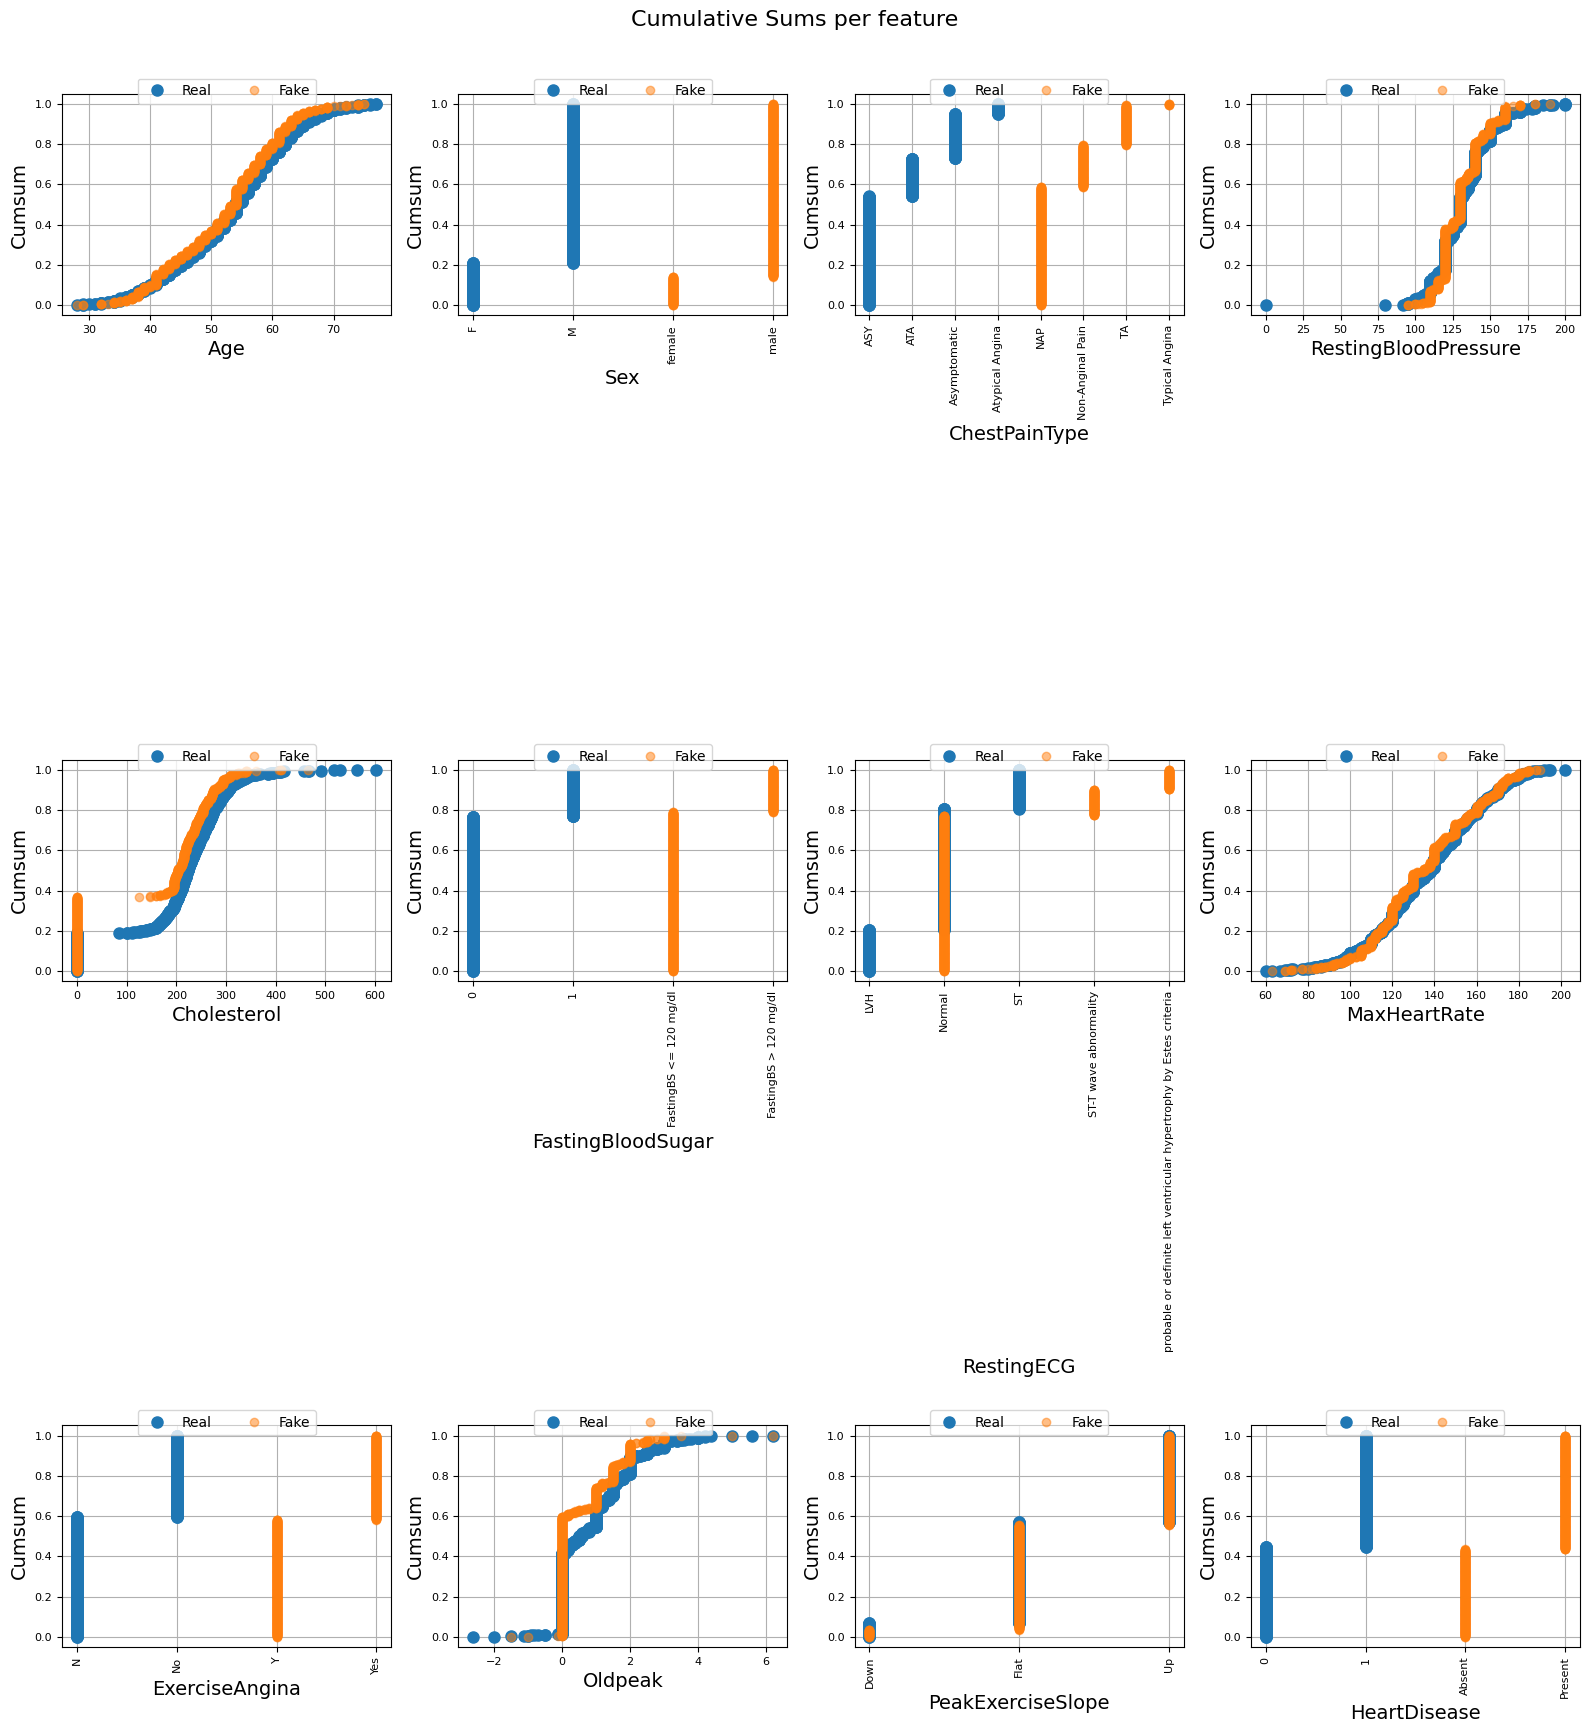

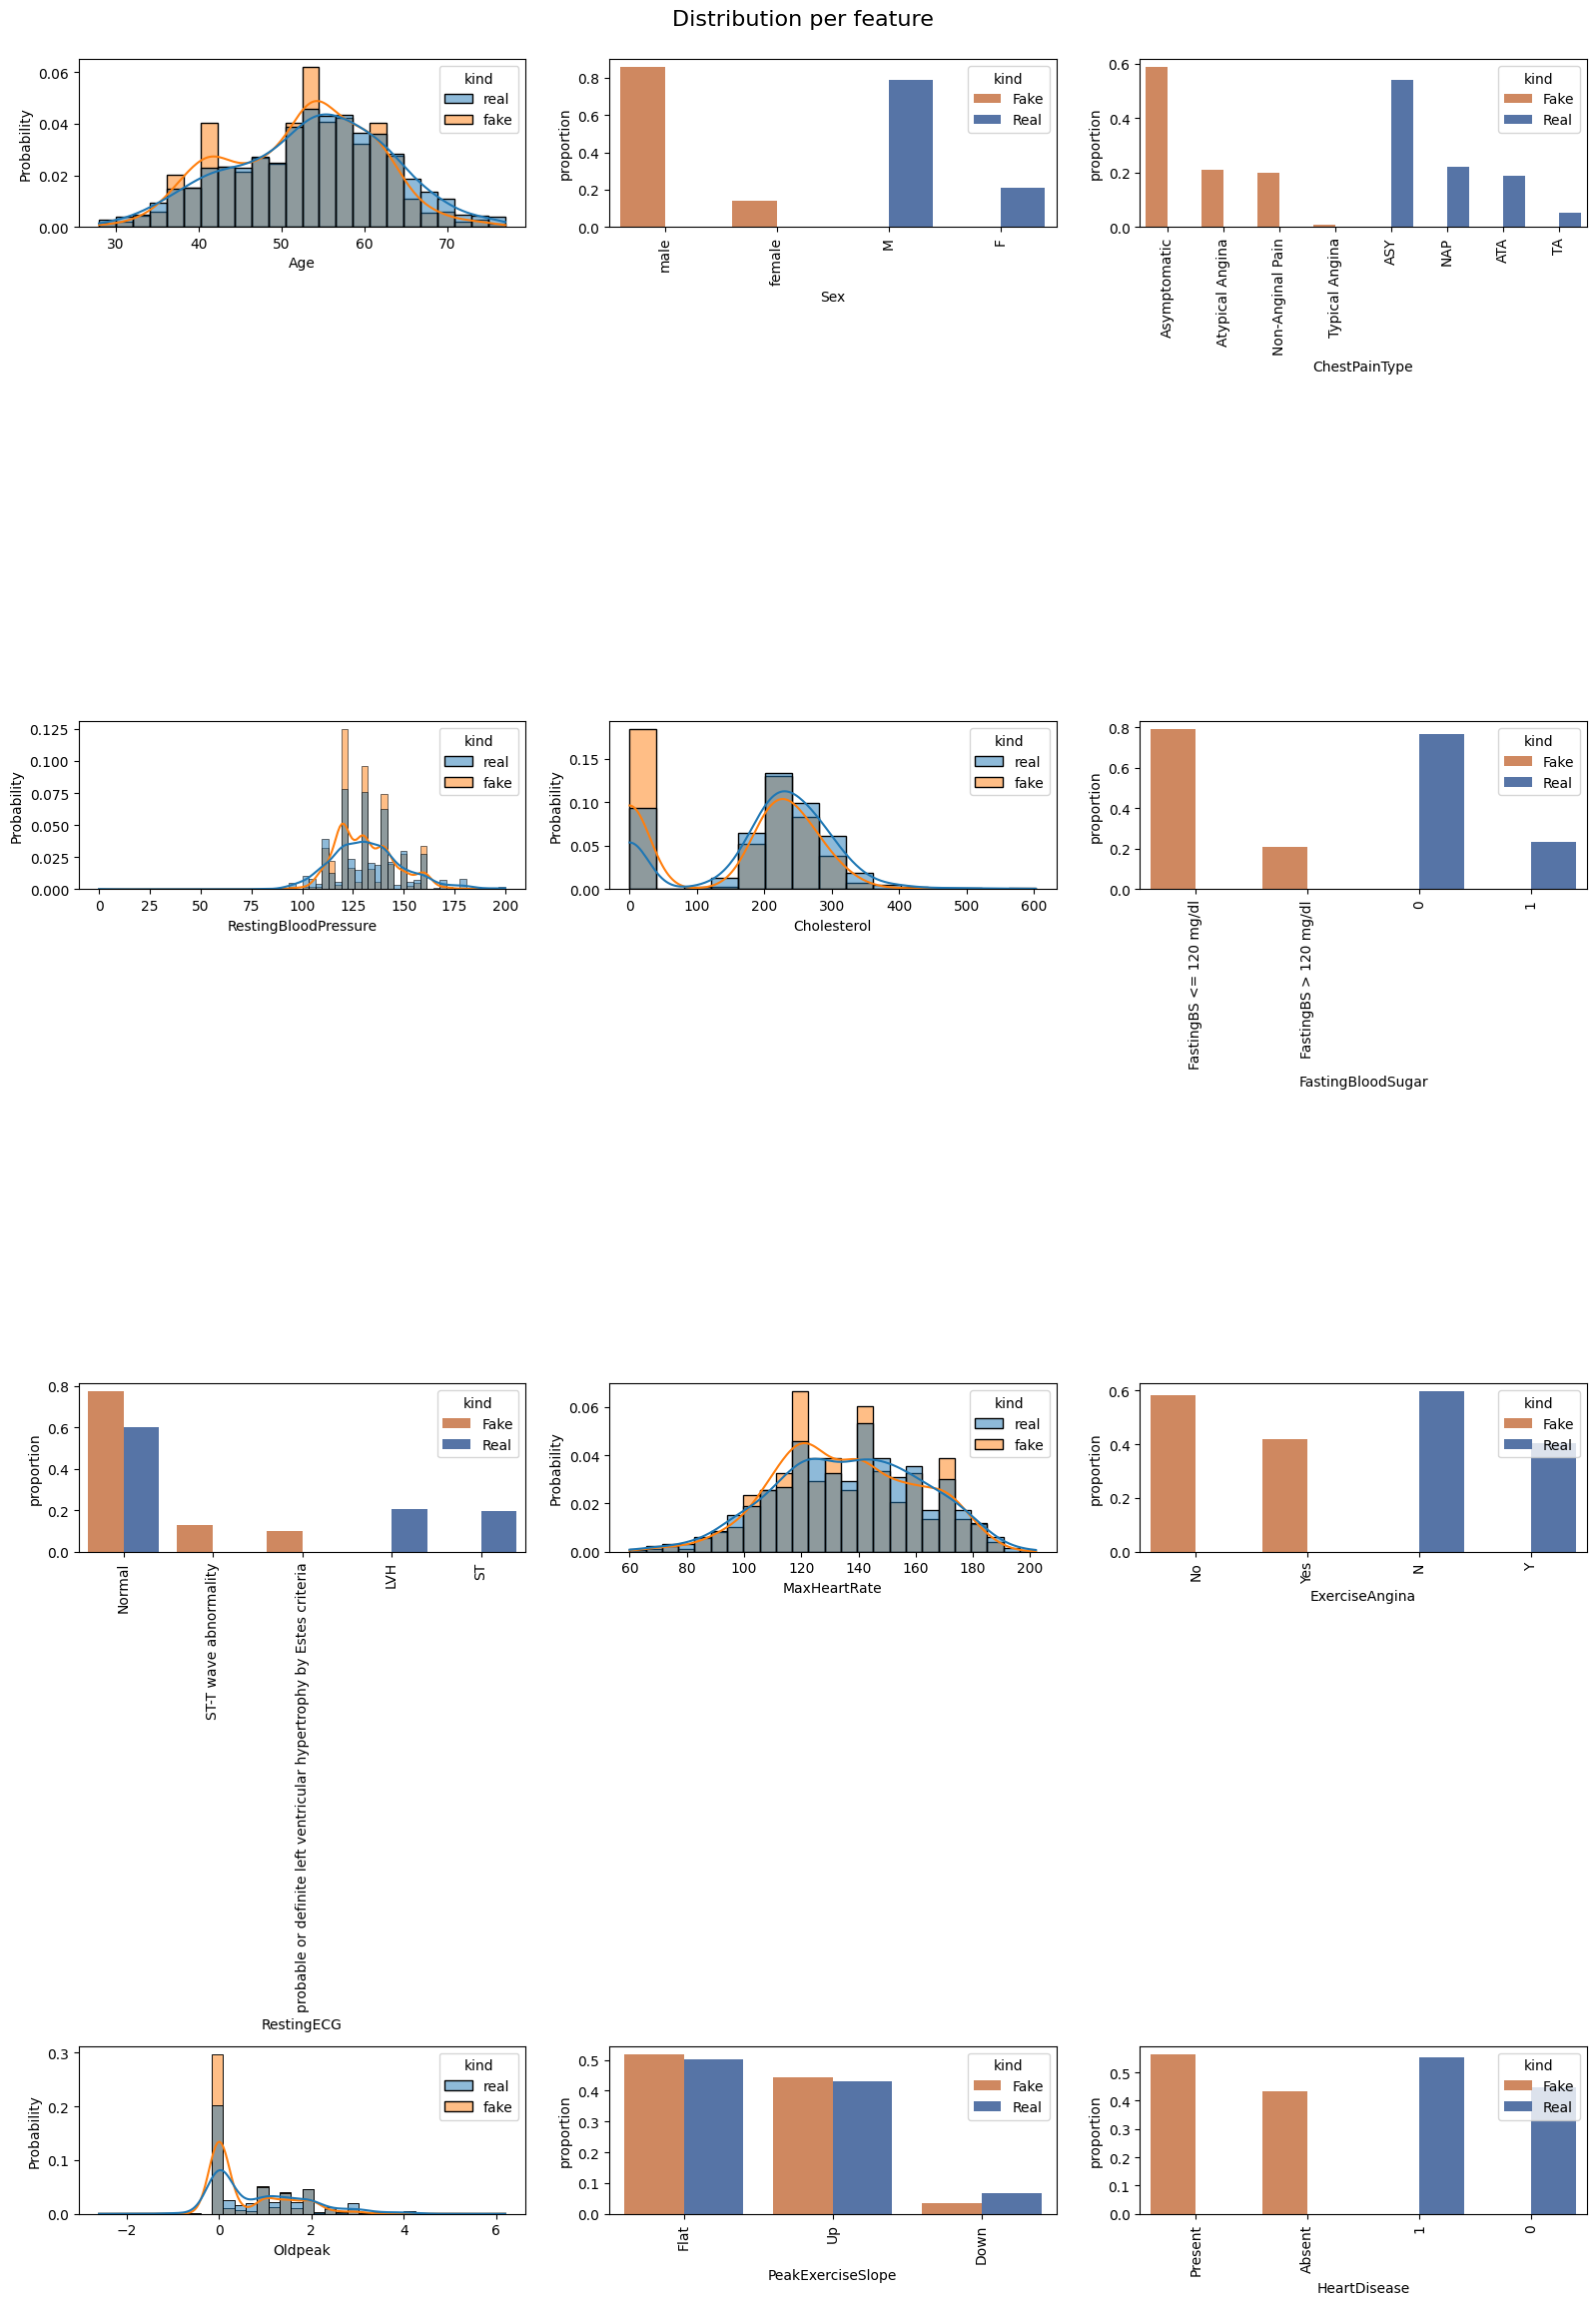

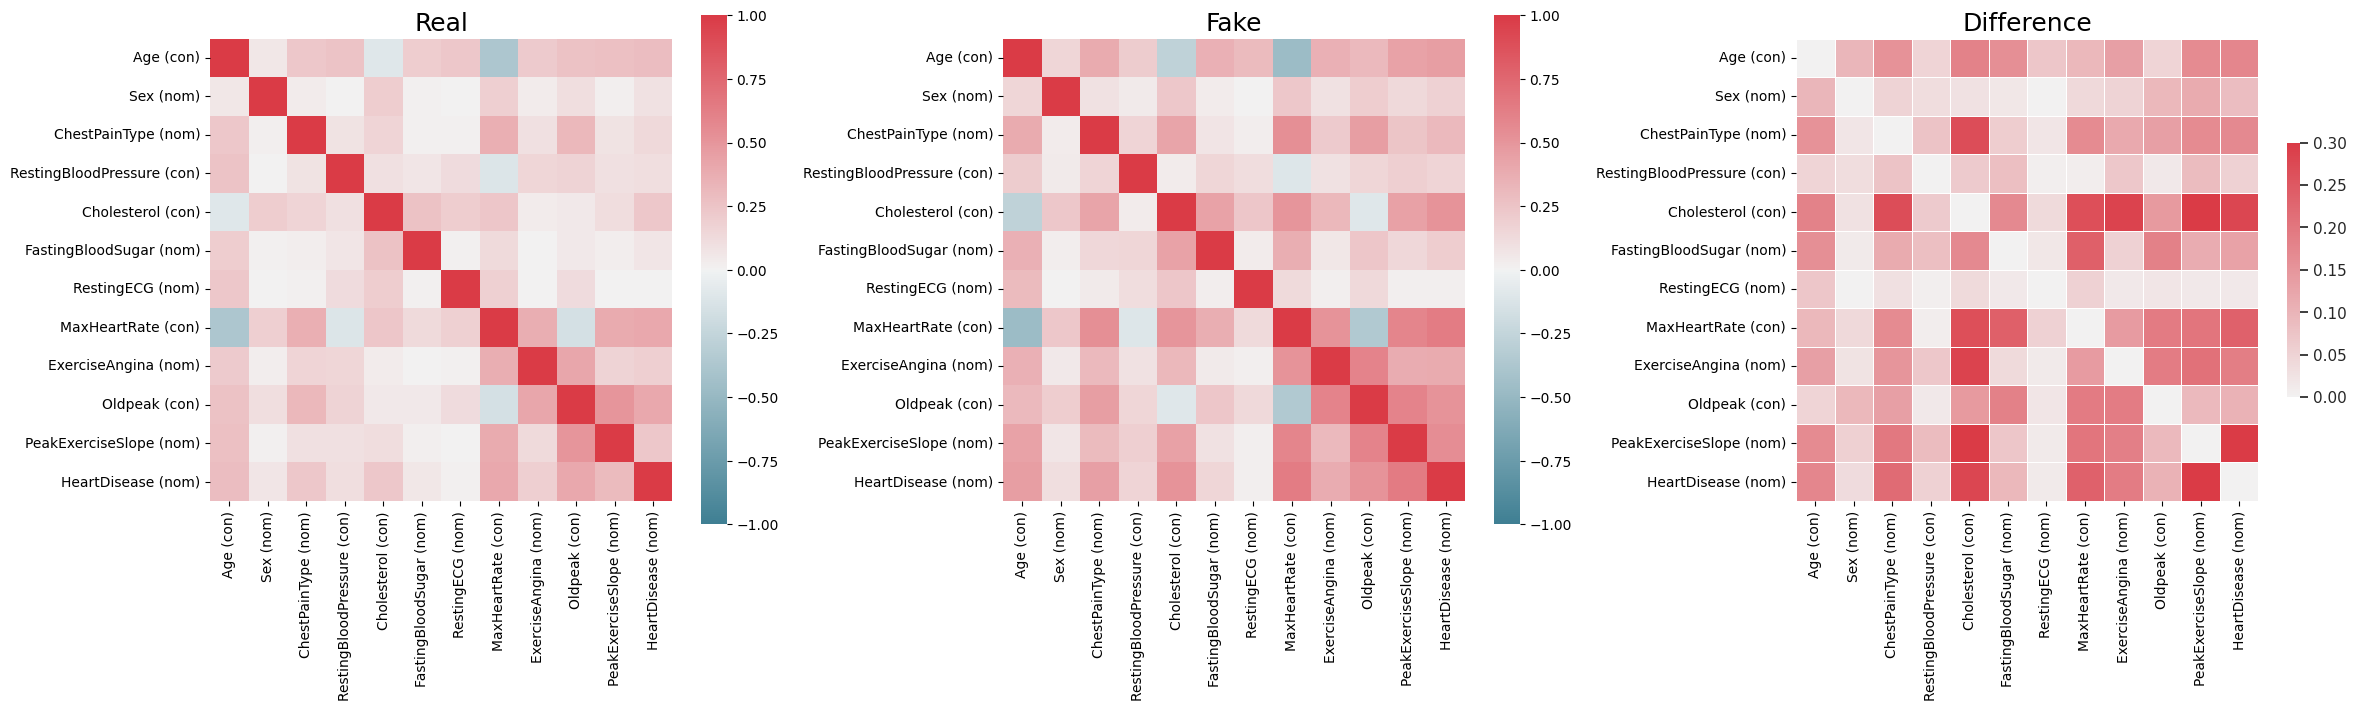

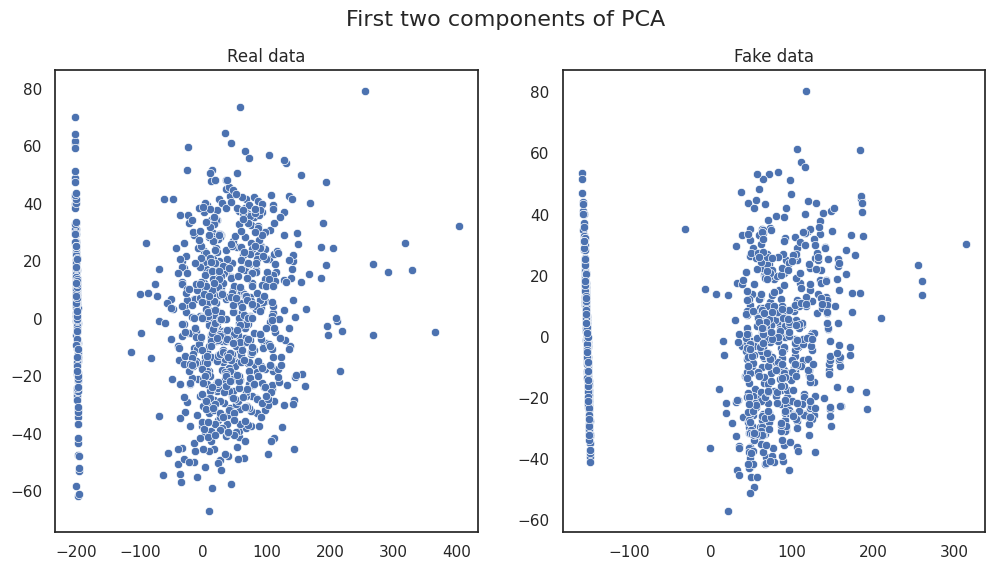

In [ ]:
from table_evaluator import TableEvaluator

cat_cols = ['Sex', 'ChestPainType', 'RestingECG', 'FastingBloodSugar',
             'ExerciseAngina', 'PeakExerciseSlope', 'HeartDisease']

table_evaluator_great = TableEvaluator(heart, great_heart, cat_cols=cat_cols)
table_evaluator_great.visual_evaluation()

In [ ]:
table_evaluator_great.evaluate(target_col='HeartDisease')


Classifier F1-scores and their Jaccard similarities::
                             f1_real  f1_fake  jaccard_similarity
index                                                            
DecisionTreeClassifier_fake   0.8804   0.9130              0.7037
DecisionTreeClassifier_real   0.7826   0.7935              0.7037
LogisticRegression_fake       0.9348   0.9185              0.9267
LogisticRegression_real       0.8261   0.8207              0.9267
MLPClassifier_fake            0.9293   0.8913              0.9067
MLPClassifier_real            0.7554   0.7446              0.8776
RandomForestClassifier_fake   0.9239   0.9076              0.9067
RandomForestClassifier_real   0.8043   0.8261              0.8218

Privacy results:
                                         result
Duplicate rows between sets (real/fake)  (0, 0)
nearest neighbor mean                    1.8169
nearest neighbor std                     0.4055

Miscellaneous results:
                                  Result
Column Cor

###hepatitisC vs great_custom_hepatitisC

In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   918 non-null    int64  
 1   Sex                   918 non-null    object 
 2   ChestPainType         918 non-null    object 
 3   RestingBloodPressure  918 non-null    int64  
 4   Cholesterol           918 non-null    int64  
 5   FastingBloodSugar     918 non-null    object 
 6   RestingECG            918 non-null    object 
 7   MaxHeartRate          918 non-null    int64  
 8   ExerciseAngina        918 non-null    object 
 9   Oldpeak               918 non-null    float64
 10  PeakExerciseSlope     918 non-null    object 
 11  HeartDisease          918 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 86.2+ KB


In [ ]:
great_custom_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919 entries, 0 to 918
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   919 non-null    float64
 1   Sex                   919 non-null    object 
 2   ChestPainType         919 non-null    object 
 3   RestingBloodPressure  919 non-null    float64
 4   Cholesterol           919 non-null    float64
 5   FastingBloodSugar     919 non-null    object 
 6   RestingECG            919 non-null    object 
 7   MaxHeartRate          919 non-null    float64
 8   ExerciseAngina        919 non-null    object 
 9   Oldpeak               919 non-null    float64
 10  PeakExerciseSlope     919 non-null    object 
 11  HeartDisease          919 non-null    object 
dtypes: float64(5), object(7)
memory usage: 86.3+ KB


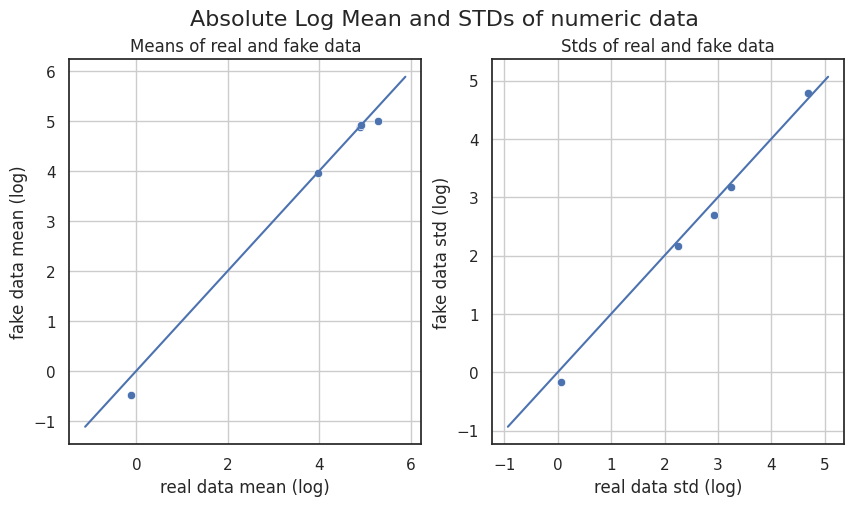

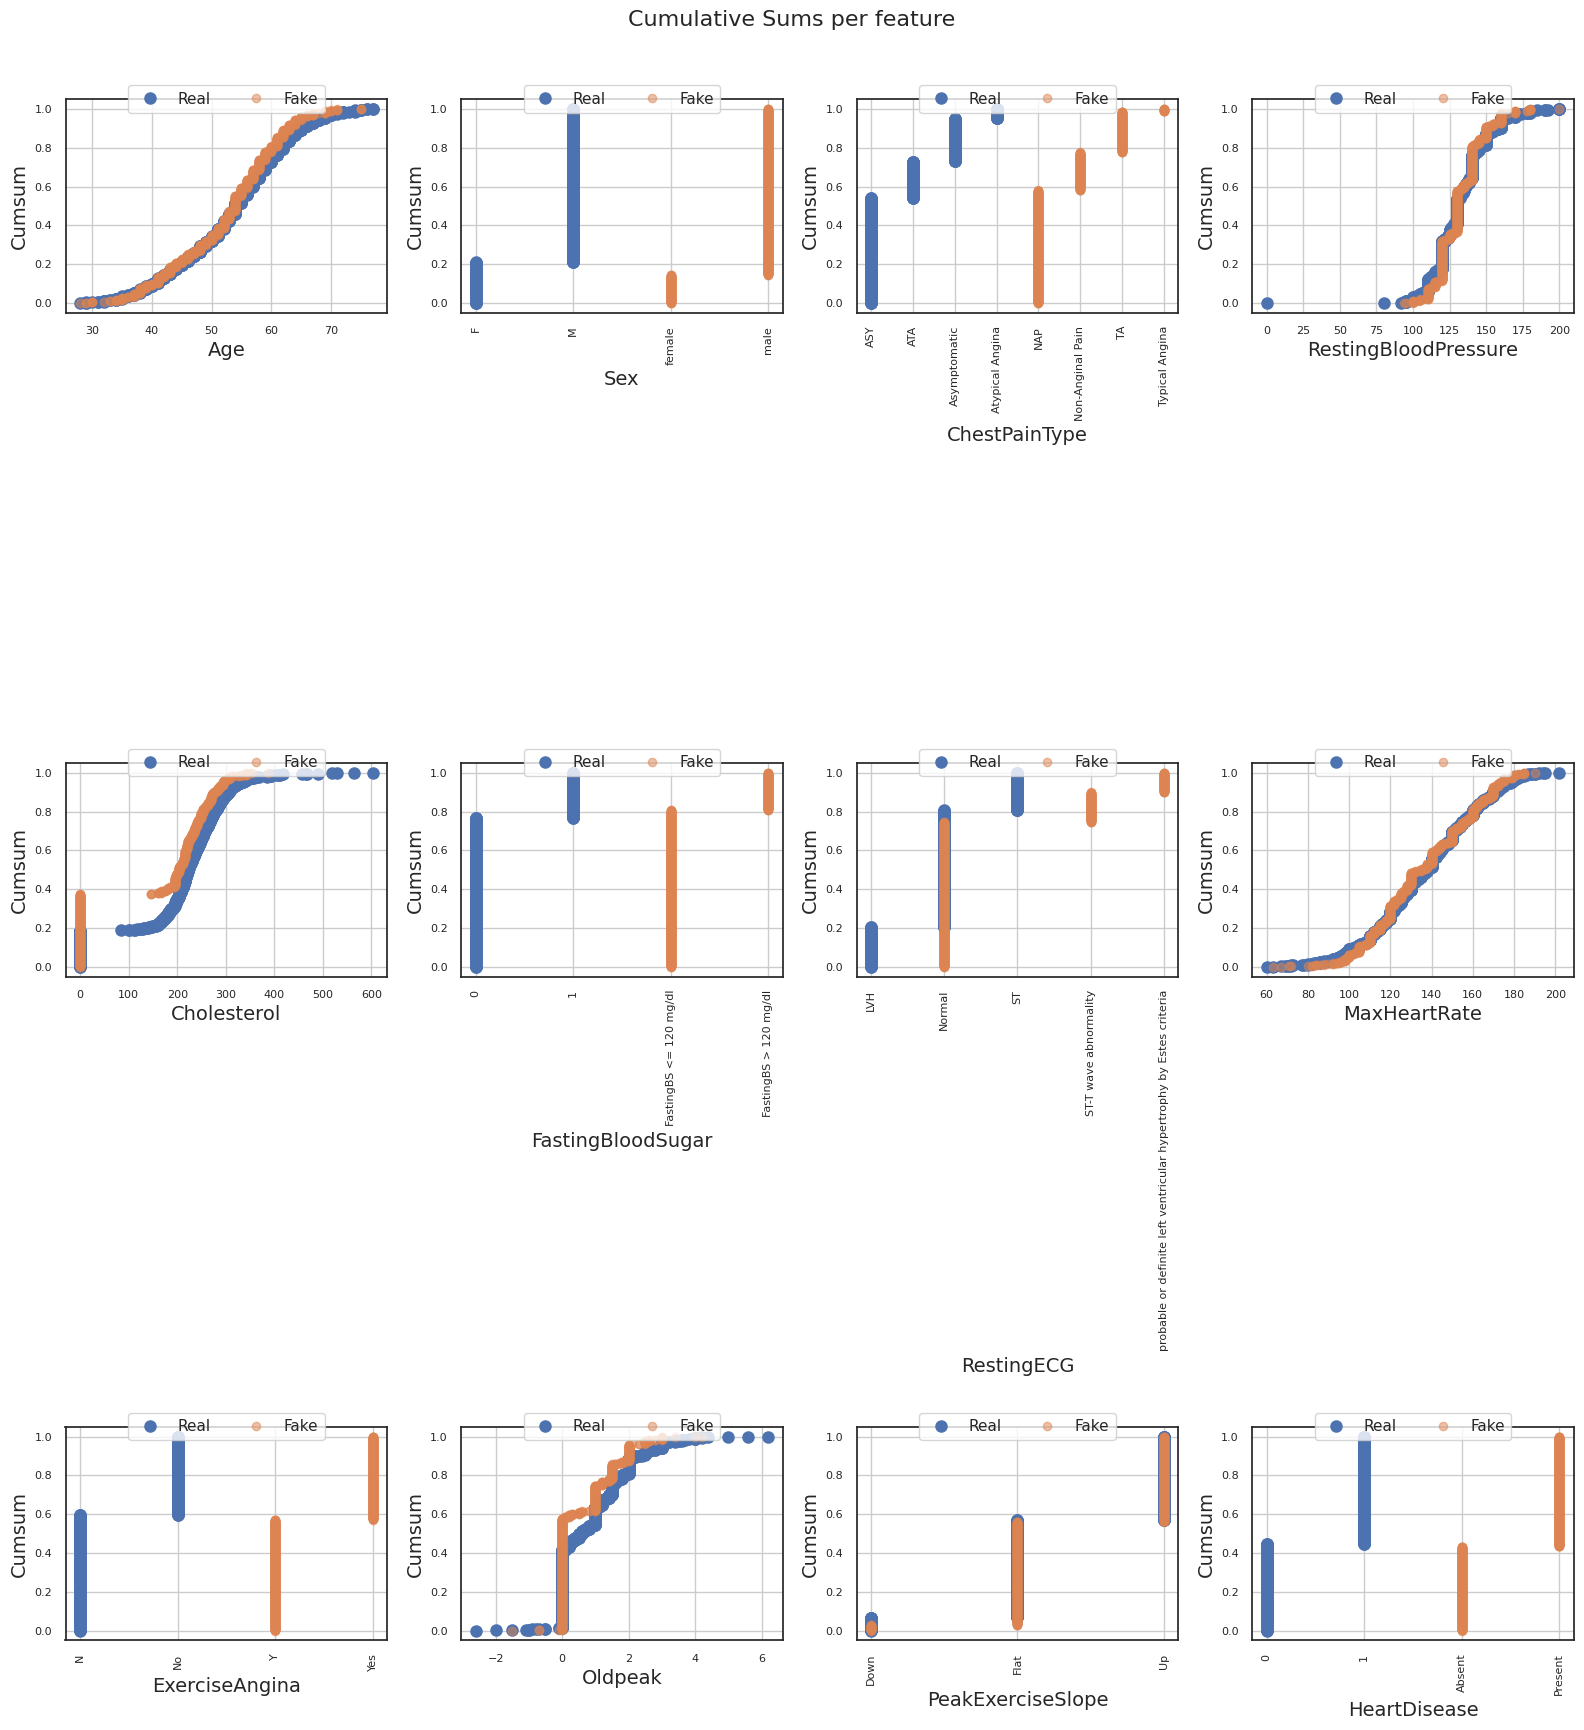

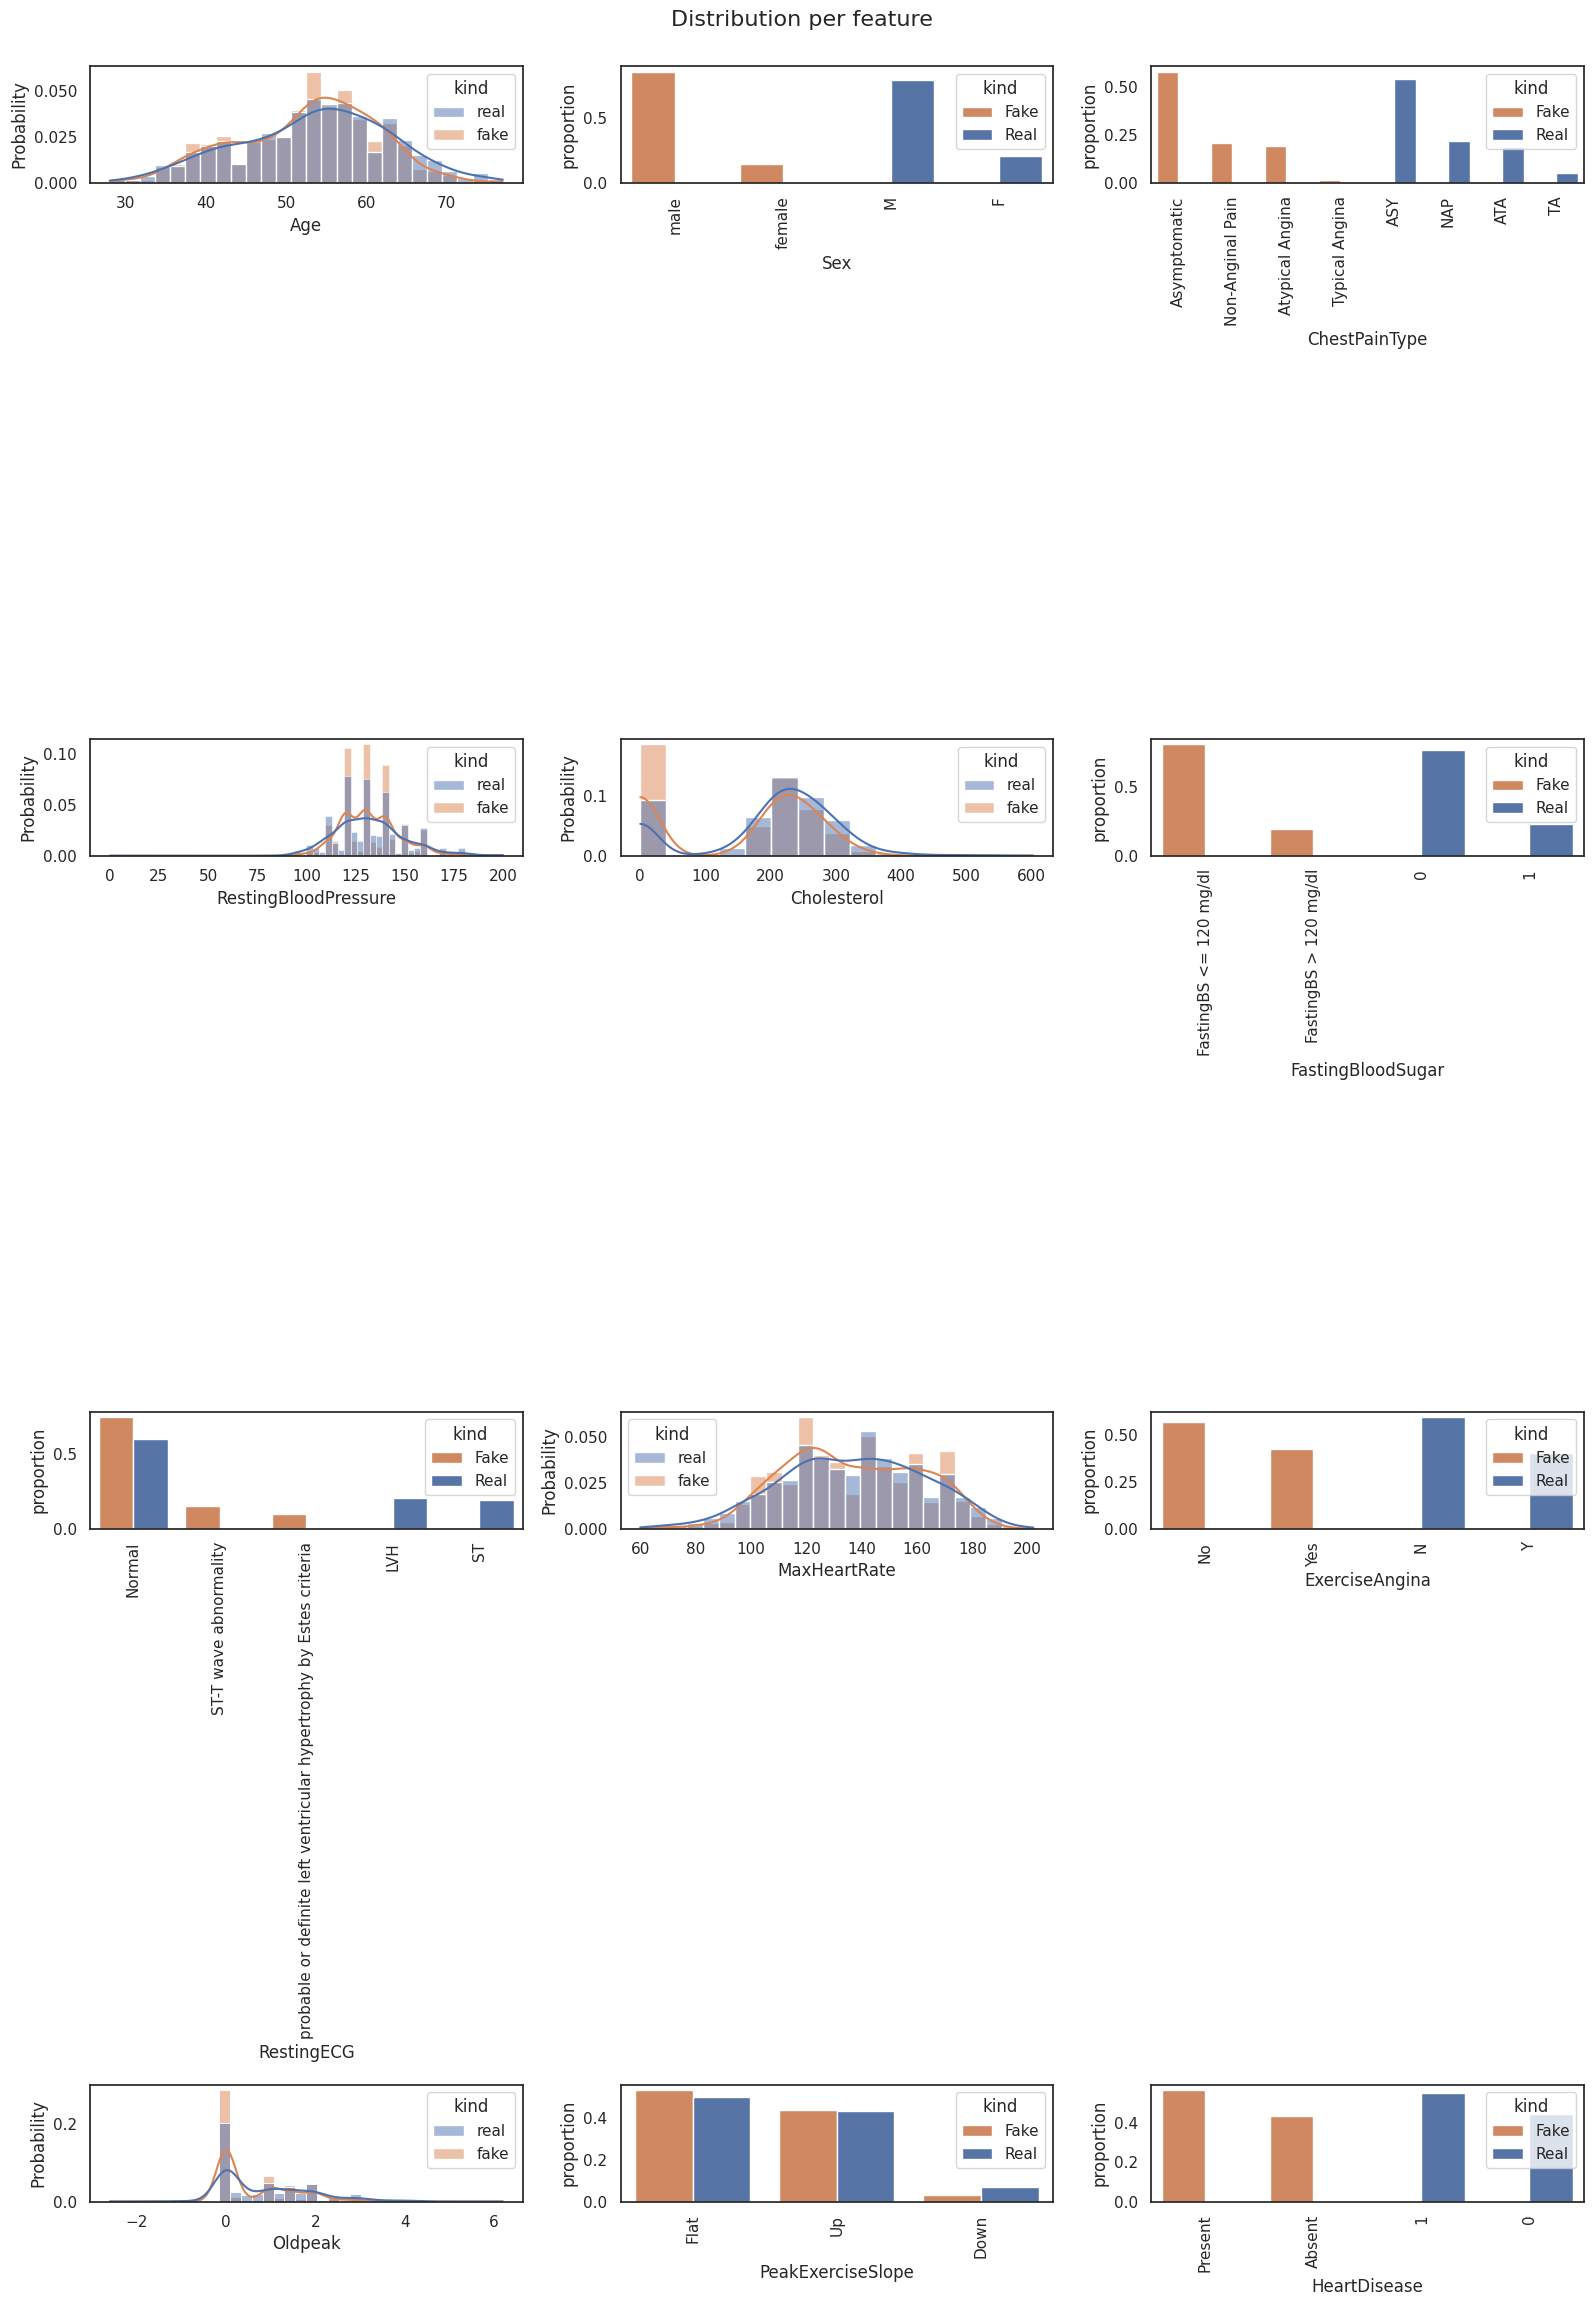

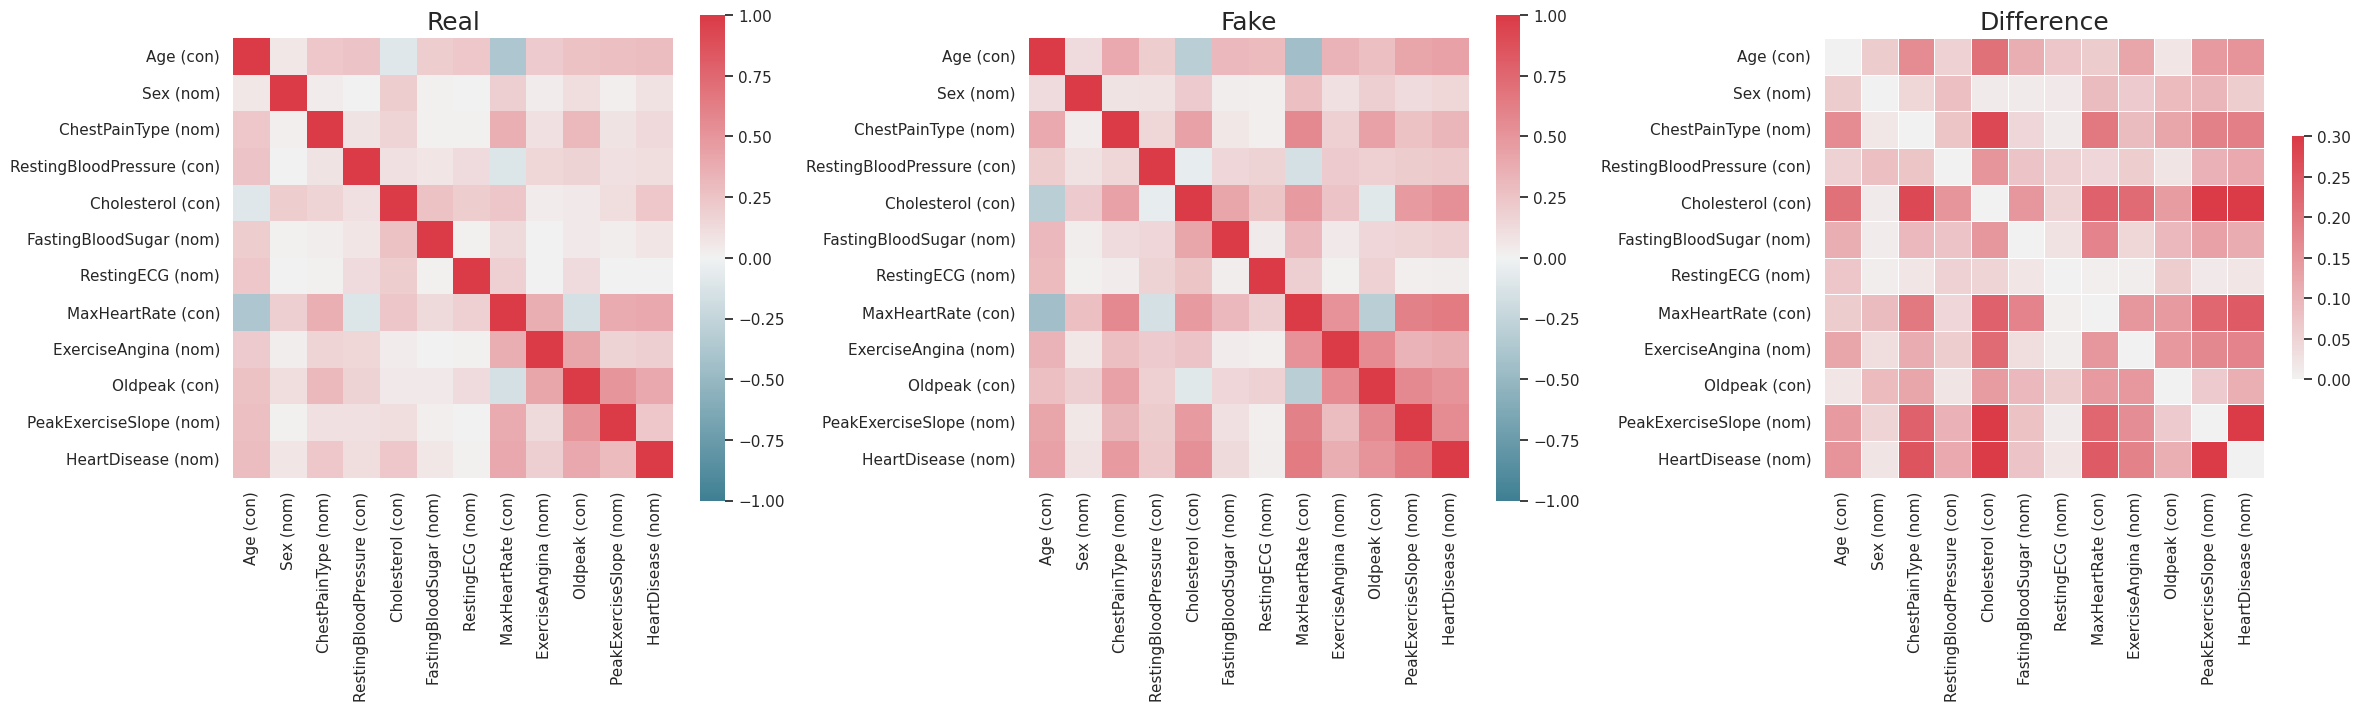

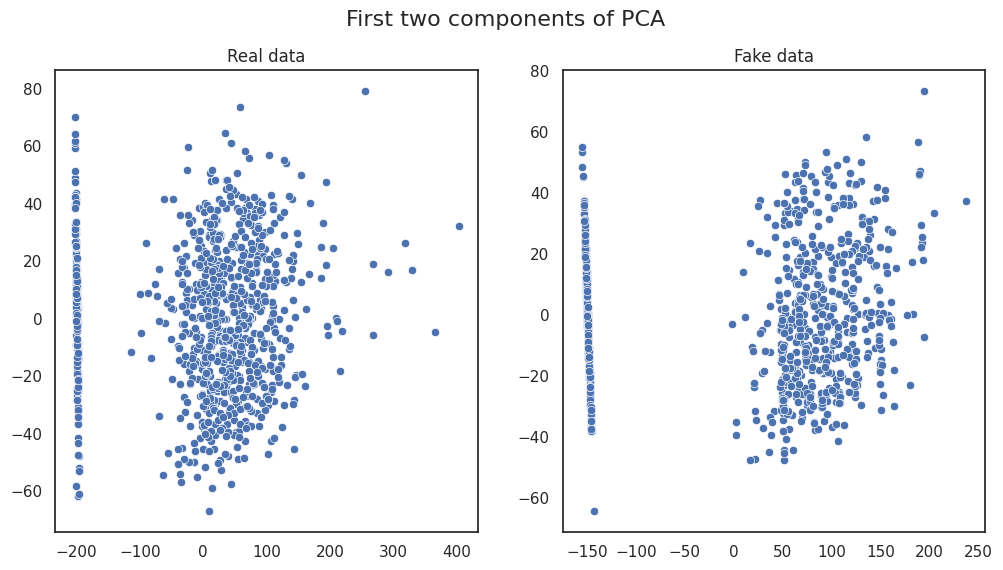

In [ ]:
table_evaluator_great_custom = TableEvaluator(heart, great_custom_heart, cat_cols=cat_cols)
table_evaluator_great_custom.visual_evaluation()

In [ ]:
table_evaluator_great_custom.evaluate(target_col='HeartDisease')


Classifier F1-scores and their Jaccard similarities::
                             f1_real  f1_fake  jaccard_similarity
index                                                            
DecisionTreeClassifier_fake   0.8967   0.9511              0.8039
DecisionTreeClassifier_real   0.8207   0.8370              0.6502
LogisticRegression_fake       0.9674   0.9565              0.9785
LogisticRegression_real       0.9076   0.8967              0.9574
MLPClassifier_fake            0.9674   0.9402              0.9267
MLPClassifier_real            0.8750   0.8370              0.8680
RandomForestClassifier_fake   0.9620   0.9457              0.9267
RandomForestClassifier_real   0.8750   0.8859              0.7864

Privacy results:
                                         result
Duplicate rows between sets (real/fake)  (0, 2)
nearest neighbor mean                    1.7457
nearest neighbor std                     0.4226

Miscellaneous results:
                                  Result
Column Cor

###hepatitisC vs ctgans_hepatitisC

In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   918 non-null    int64  
 1   Sex                   918 non-null    object 
 2   ChestPainType         918 non-null    object 
 3   RestingBloodPressure  918 non-null    int64  
 4   Cholesterol           918 non-null    int64  
 5   FastingBloodSugar     918 non-null    object 
 6   RestingECG            918 non-null    object 
 7   MaxHeartRate          918 non-null    int64  
 8   ExerciseAngina        918 non-null    object 
 9   Oldpeak               918 non-null    float64
 10  PeakExerciseSlope     918 non-null    object 
 11  HeartDisease          918 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 86.2+ KB


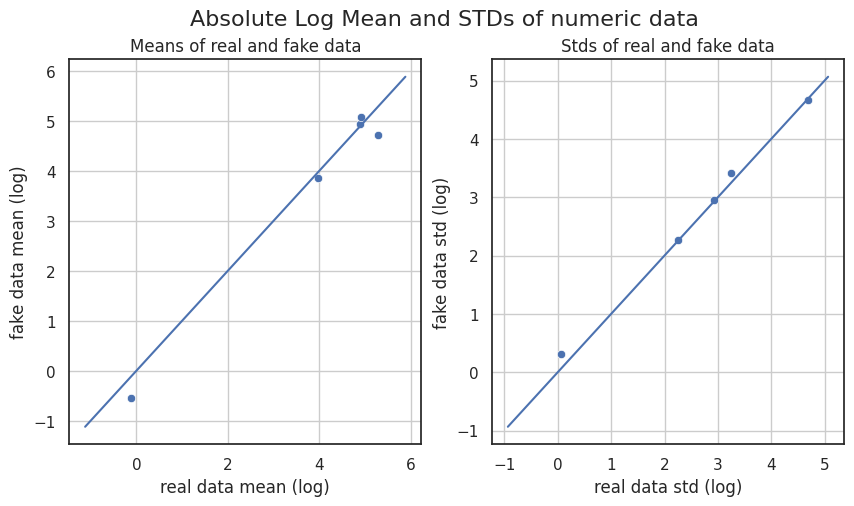

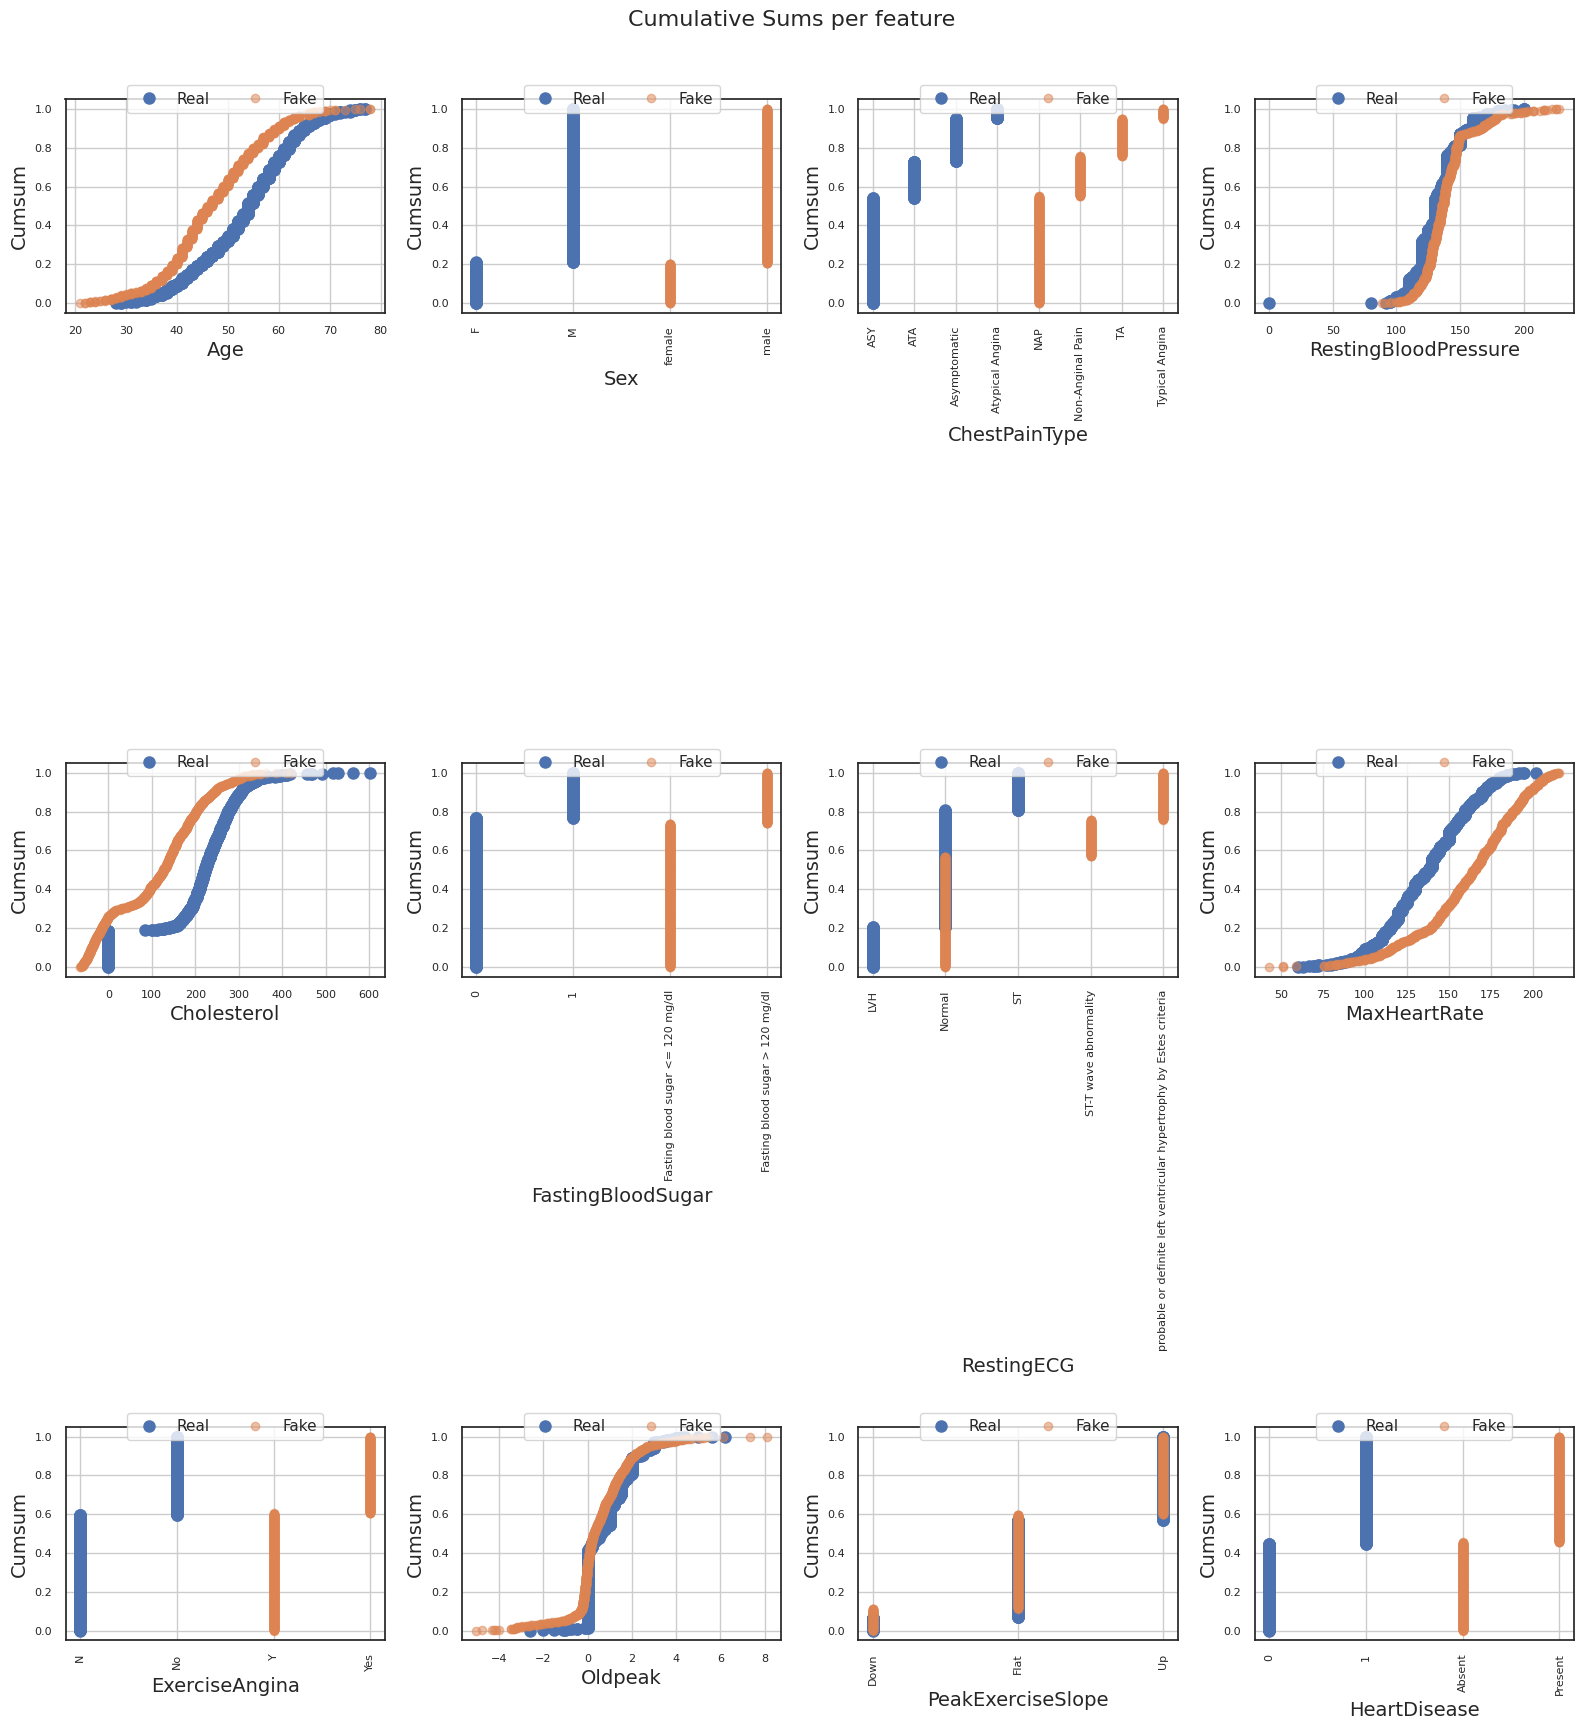

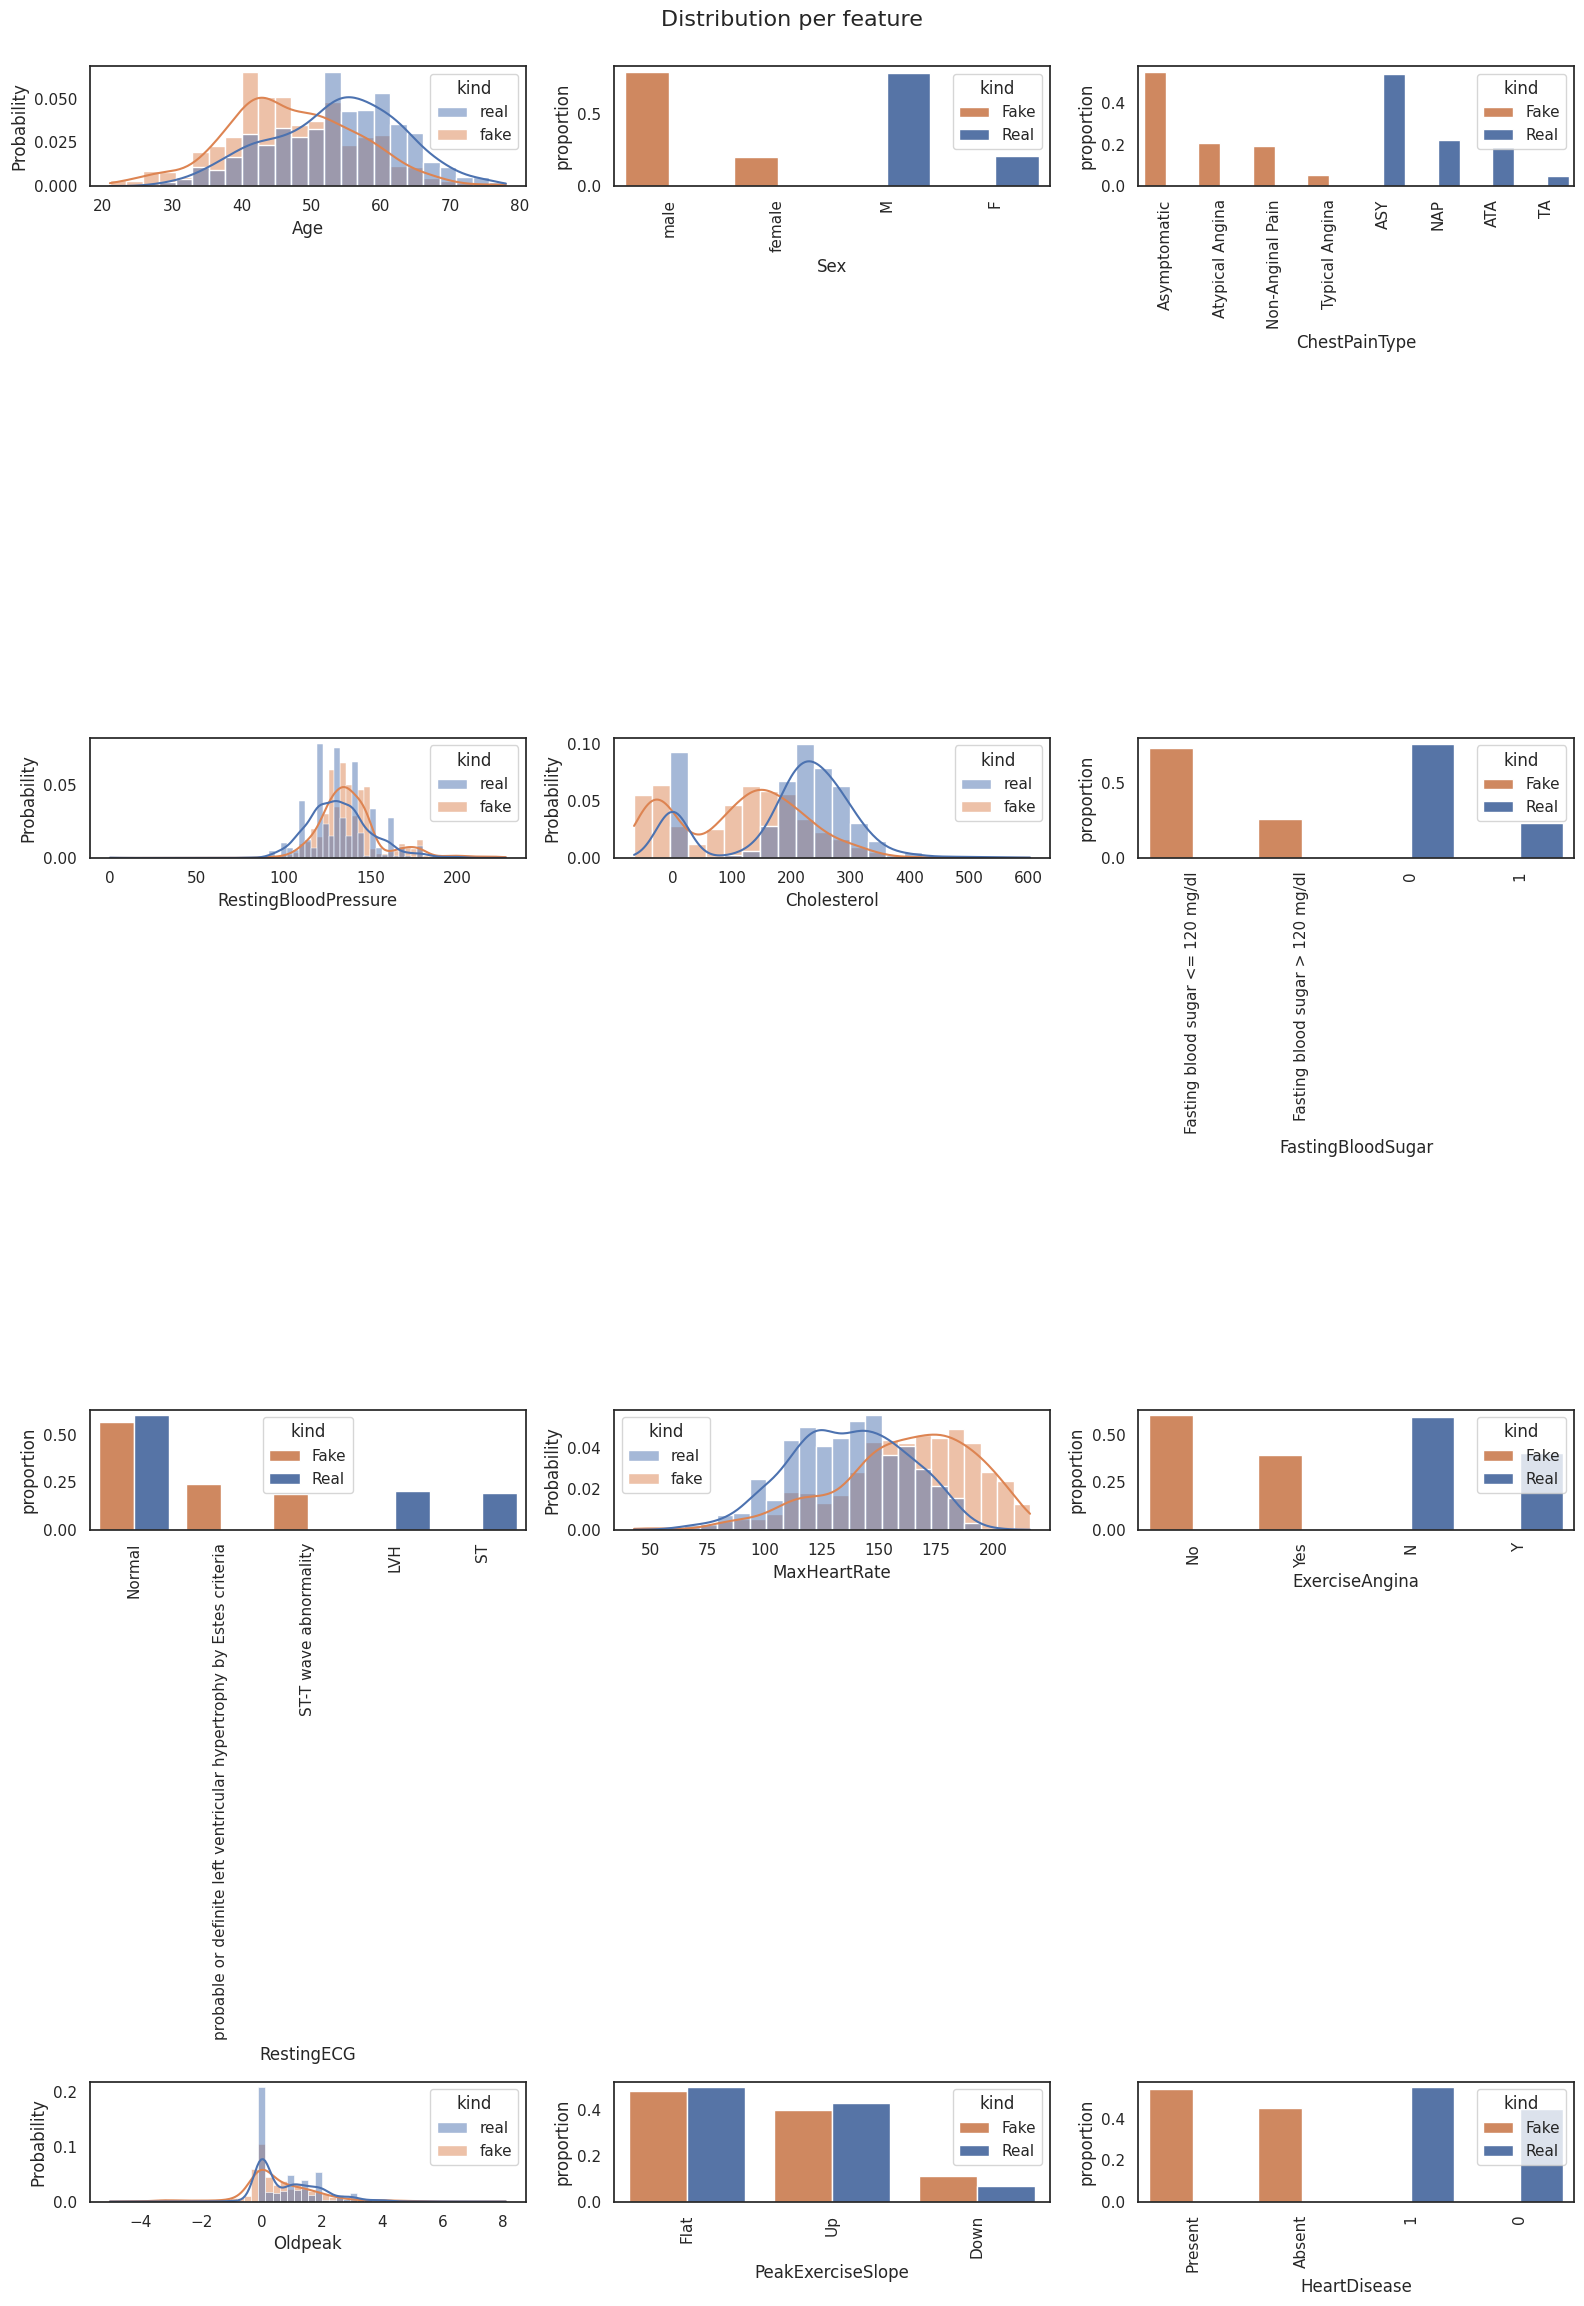

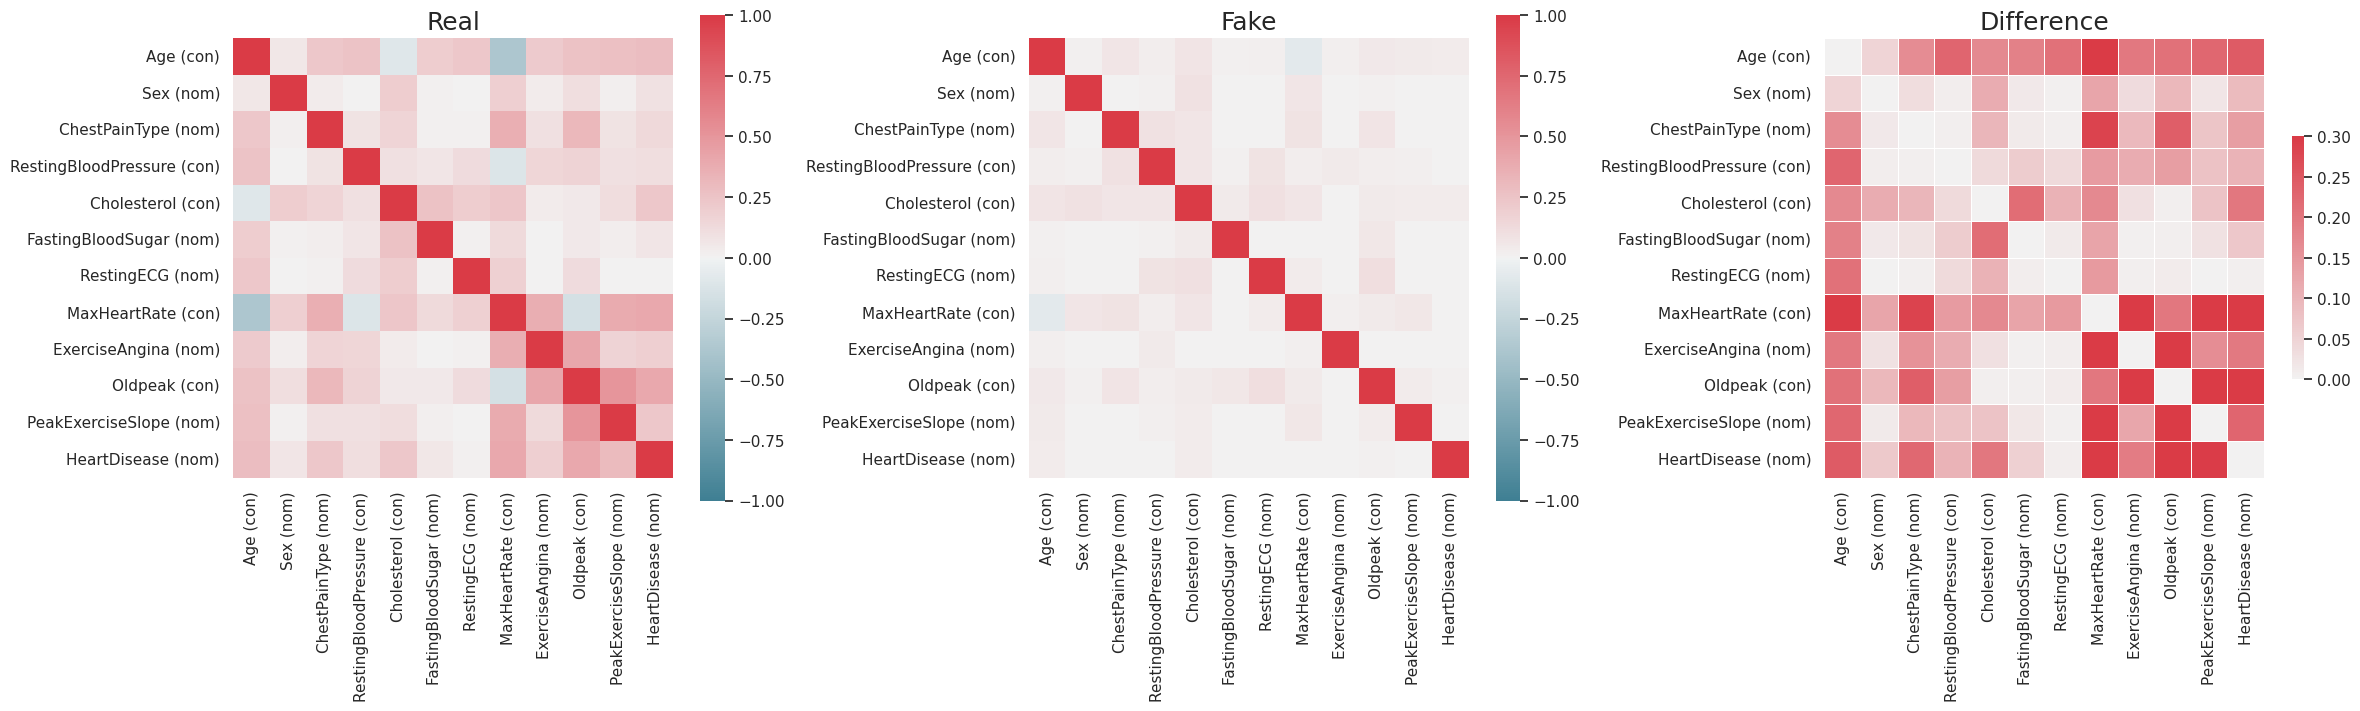

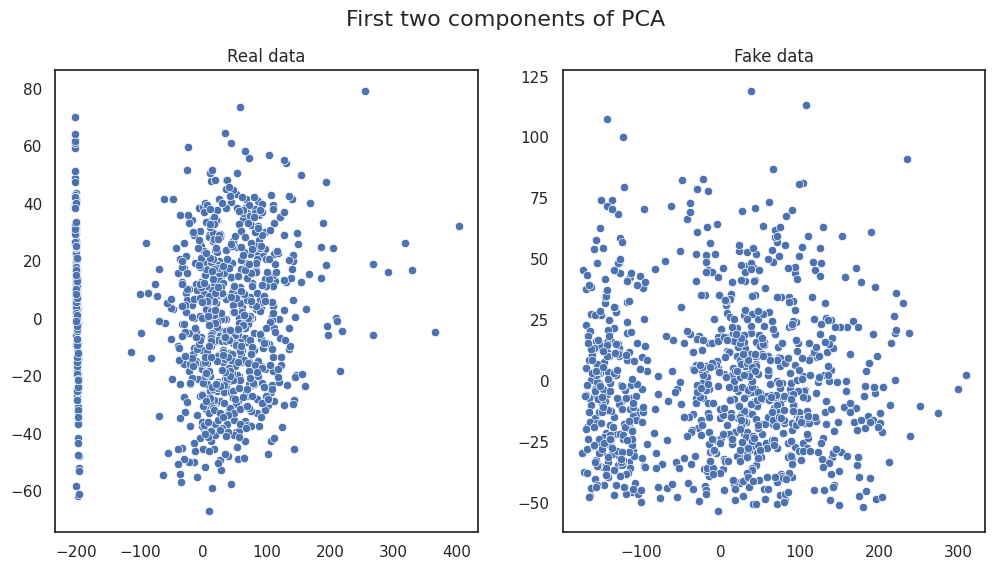

In [ ]:
table_evaluator_ctgans = TableEvaluator(heart, ctgans_heart, cat_cols=cat_cols)
table_evaluator_ctgans.visual_evaluation()

In [ ]:
table_evaluator_ctgans.evaluate(target_col='HeartDisease')


Classifier F1-scores and their Jaccard similarities::
                             f1_real  f1_fake  jaccard_similarity
index                                                            
DecisionTreeClassifier_fake   0.4511   0.5000              0.3579
DecisionTreeClassifier_real   0.8207   0.4402              0.3431
LogisticRegression_fake       0.5163   0.4946              0.4959
LogisticRegression_real       0.9076   0.6033              0.4488
MLPClassifier_fake            0.5109   0.4620              0.2734
MLPClassifier_real            0.8750   0.4837              0.3333
RandomForestClassifier_fake   0.4783   0.4783              0.3050
RandomForestClassifier_real   0.8750   0.5000              0.3680

Privacy results:
                                         result
Duplicate rows between sets (real/fake)  (0, 0)
nearest neighbor mean                    1.7116
nearest neighbor std                     0.4188

Miscellaneous results:
                                  Result
Column Cor

## Old approach

https://medium.com/analytics-vidhya/a-step-by-step-guide-to-generate-tabular-synthetic-dataset-with-gans-d55fc373c8db

https://github.com/Baukebrenninkmeijer/table-evaluator/tree/master

In [ ]:

'''
from fairlearn.metrics import MetricFrame, equalized_odds_difference, demographic_parity_ratio

# Function to calculate fairness metrics using Fairlearn
def calculate_fairness_metrics(df, sensitive_attr, target_var):
    X = df.drop(columns=[target_var])
    y = df[target_var]

    # Make predictions using the trained classifier
    y_pred = rf_classifier.predict(X)

    # Calculate fairness metrics
    metric_frame = MetricFrame(equalized_odds_difference, y_true=y, y_pred=y_pred, sensitive_features=df[sensitive_attr])

    return metric_frame

# Calculate fairness metrics for each dataset
original_fairness_metrics = calculate_fairness_metrics(hepatitisC, sensitive_attribute, target_variable)
begreat_fairness_metrics = calculate_fairness_metrics(great_hepatitisC, sensitive_attribute, target_variable)
begreat_custom_fairness_metrics = calculate_fairness_metrics(great_custom_hepatitisC, sensitive_attribute, target_variable)

# Print fairness metrics
print("Fairness Metrics (Original Dataset):")
print(original_fairness_metrics.overall)

print("\nFairness Metrics (be-GreaT Synthetic Dataset):")
print(begreat_fairness_metrics.overall)

print("\nFairness Metrics (be-GreaT constrained Synthetic Dataset):")
print(begreat_custom_fairness_metrics.overall)
'''


'\nfrom fairlearn.metrics import MetricFrame, equalized_odds_difference, demographic_parity_ratio\n\n# Function to calculate fairness metrics using Fairlearn\ndef calculate_fairness_metrics(df, sensitive_attr, target_var):\n    X = df.drop(columns=[target_var])\n    y = df[target_var]\n\n    # Make predictions using the trained classifier\n    y_pred = rf_classifier.predict(X)\n\n    # Calculate fairness metrics\n    metric_frame = MetricFrame(equalized_odds_difference, y_true=y, y_pred=y_pred, sensitive_features=df[sensitive_attr])\n\n    return metric_frame\n\n# Calculate fairness metrics for each dataset\noriginal_fairness_metrics = calculate_fairness_metrics(hepatitisC, sensitive_attribute, target_variable)\nbegreat_fairness_metrics = calculate_fairness_metrics(great_hepatitisC, sensitive_attribute, target_variable)\nbegreat_custom_fairness_metrics = calculate_fairness_metrics(great_custom_hepatitisC, sensitive_attribute, target_variable)\n\n# Print fairness metrics\nprint("Fairnes

In [ ]:
'''
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from catboost import CatBoostClassifier
from fairlearn.metrics import MetricFrame, selection_rate, demographic_parity_difference
from fairlearn.metrics import false_positive_rate, true_positive_rate

# Define a function for classification
def classify_dataset(dataset, sensitive_attribute, target_variable):
    # Split data into features and labels
    X = dataset.drop(columns=[target_variable])
    y = dataset[target_variable]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Convert categorical features to strings
    categorical_features_indices = X.select_dtypes(include=['object']).columns

    # Initialize the CatBoostClassifier
    catboost_model = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, random_state=42, cat_features=list(categorical_features_indices))

    # Train the model on the training data
    catboost_model.fit(X_train, y_train, cat_features=list(categorical_features_indices))

    # Predict on the testing data
    y_pred = catboost_model.predict(X_test)

    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    classification_metrics = classification_report(y_test, y_pred)

    return accuracy, classification_metrics, y_test, y_pred

# Classify each dataset and assess fairness
accuracy_original, metrics_original, X_test_original, y_test_original, y_pred_original = classify_dataset(hepatitisC, sensitive_attribute, target_variable)
#accuracy_synthetic1, metrics_synthetic1, y_test_synthetic1, y_pred_synthetic1 = classify_dataset(great_hepatitis

# Print classification results (continued)
print("Classification Results (Original Dataset):")
print(f"Accuracy: {accuracy_original}")
print("Classification Metrics:")
print(metrics_original)

'''

'\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import accuracy_score, classification_report\nfrom catboost import CatBoostClassifier\nfrom fairlearn.metrics import MetricFrame, selection_rate, demographic_parity_difference\nfrom fairlearn.metrics import false_positive_rate, true_positive_rate\n\n# Define a function for classification\ndef classify_dataset(dataset, sensitive_attribute, target_variable):\n    # Split data into features and labels\n    X = dataset.drop(columns=[target_variable])\n    y = dataset[target_variable]\n\n    # Split the data into training and testing sets\n    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n    # Convert categorical features to strings\n    categorical_features_indices = X.select_dtypes(include=[\'object\']).columns\n\n    # Initialize the CatBoostClassifier\n    catboost_model = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, random_state=42, cat_feature

In [ ]:
'''
from sklearn.metrics import confusion_matrix
import numpy as np

# Define a function to calculate fairness metrics
def calculate_fairness_metrics(y_true, y_pred, sensitive_features):
    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Extract true positive, false positive, true negative, and false negative counts
    tn, fp, fn, tp = conf_matrix.ravel()

    # Calculate the selection rates
    selection_rate_sensitive = np.sum(sensitive_features) / len(sensitive_features)
    selection_rate_non_sensitive = 1 - selection_rate_sensitive

    # Calculate demographic parity difference (DP)
    dp = selection_rate_sensitive - selection_rate_non_sensitive

    # Calculate true positive rates (TPR)
    tpr_sensitive = tp / (tp + fn)
    tpr_non_sensitive = tn / (tn + fp)

    # Calculate equal opportunity difference (EO)
    eo = tpr_sensitive - tpr_non_sensitive

    return dp, eo

# Calculate fairness metrics for the original dataset
dp_original, eo_original = calculate_fairness_metrics(y_test_original, y_pred_original, hepatitisC[sensitive_attribute])

# Calculate fairness metrics for the synthetic dataset (be-GReaT)
dp_synthetic1, eo_synthetic1 = calculate_fairness_metrics(y_test_synthetic1, y_pred_synthetic1, great_hepatitisC[sensitive_attribute])

# Calculate fairness metrics for the synthetic dataset with constraint (be-GReaT with constraint)
dp_synthetic2, eo_synthetic2 = calculate_fairness_metrics(y_test_synthetic2, y_pred_synthetic2, great_custom_hepatitisC[sensitive_attribute])

# Print fairness metrics
print("Fairness Metrics (Original Dataset):")
print("Demographic Parity Difference (DP):", dp_original)
print("Equal Opportunity Difference (EO):", eo_original)
print()

print("Fairness Metrics (be-GReaT):")
print("Demographic Parity Difference (DP):", dp_synthetic1)
print("Equal Opportunity Difference (EO):", eo_synthetic1)
print()

print("Fairness Metrics (be-GReaT with constraint):")
print("Demographic Parity Difference (DP):", dp_synthetic2)
print("Equal Opportunity Difference (EO):", eo_synthetic2)
'''

'\nfrom sklearn.metrics import confusion_matrix\nimport numpy as np\n\n# Define a function to calculate fairness metrics\ndef calculate_fairness_metrics(y_true, y_pred, sensitive_features):\n    # Calculate the confusion matrix\n    conf_matrix = confusion_matrix(y_true, y_pred)\n\n    # Extract true positive, false positive, true negative, and false negative counts\n    tn, fp, fn, tp = conf_matrix.ravel()\n\n    # Calculate the selection rates\n    selection_rate_sensitive = np.sum(sensitive_features) / len(sensitive_features)\n    selection_rate_non_sensitive = 1 - selection_rate_sensitive\n\n    # Calculate demographic parity difference (DP)\n    dp = selection_rate_sensitive - selection_rate_non_sensitive\n\n    # Calculate true positive rates (TPR)\n    tpr_sensitive = tp / (tp + fn)\n    tpr_non_sensitive = tn / (tn + fp)\n\n    # Calculate equal opportunity difference (EO)\n    eo = tpr_sensitive - tpr_non_sensitive\n\n    return dp, eo\n\n# Calculate fairness metrics for the o

In [ ]:
'''
from sklearn.metrics import confusion_matrix

def calculate_fairness_metrics_by_category(y_true, y_pred, sensitive_attribute, category):
    # Filter instances for the current category and sensitive attribute
    y_true_category = y_true[(y_true['Sex'] == sensitive_attribute) & (y_true['Category'] == category)]
    y_pred_category = y_pred[(y_true['Sex'] == sensitive_attribute) & (y_true['Category'] == category)]

    # Create a confusion matrix for the current category and sensitive attribute
    cm_category = confusion_matrix(y_true_category, y_pred_category)

    # Extract TP, FP, TN, FN for the current category and sensitive attribute
    TP_category = cm_category[1, 1] if len(cm_category) > 1 else 0
    FP_category = cm_category[0, 1] if len(cm_category) > 1 else 0
    TN_category = cm_category[0, 0] if len(cm_category) > 1 else 0
    FN_category = cm_category[1, 0] if len(cm_category) > 1 else 0

    # Calculate FPR, FNR, SR, and DP for the current category and sensitive attribute
    FPR_category = FP_category / (FP_category + TN_category)
    FNR_category = FN_category / (FN_category + TP_category)
    SR_category = (TP_category + FP_category) / (TP_category + FP_category + TN_category + FN_category)
    DP_category = abs(FPR_category - FNR_category)

    return {
        'FPR': FPR_category,
        'FNR': FNR_category,
        'SR': SR_category,
        'DP': DP_category
    }

# Calculate fairness metrics separately for 'Male'
# Calculate fairness metrics separately for 'Male'
category = 'Male'
fairness_metrics_male = {}

# Calculate fairness metrics for each target category ('Category1', 'Category2', 'Category3', 'Category4')
for target_category in hepatitisC['Category'].unique():
    fairness_metrics = calculate_fairness_metrics_by_category(y_test_original, y_pred_original, category, target_category)
    fairness_metrics_male[target_category] = fairness_metrics

# Print fairness metrics for 'Male' category and each target category
for target_category, metrics in fairness_metrics_male.items():
    print(f"Fairness Metrics for 'Male' in Category {target_category}:")
    print(f"False Positive Rate (FPR): {metrics['FPR']}")
    print(f"False Negative Rate (FNR): {metrics['FNR']}")
    print(f"Selection Rate (SR): {metrics['SR']}")
    print(f"Demographic Parity (DP): {metrics['DP']}")
    print()
'''

'\nfrom sklearn.metrics import confusion_matrix\n\ndef calculate_fairness_metrics_by_category(y_true, y_pred, sensitive_attribute, category):\n    # Filter instances for the current category and sensitive attribute\n    y_true_category = y_true[(y_true[\'Sex\'] == sensitive_attribute) & (y_true[\'Category\'] == category)]\n    y_pred_category = y_pred[(y_true[\'Sex\'] == sensitive_attribute) & (y_true[\'Category\'] == category)]\n\n    # Create a confusion matrix for the current category and sensitive attribute\n    cm_category = confusion_matrix(y_true_category, y_pred_category)\n\n    # Extract TP, FP, TN, FN for the current category and sensitive attribute\n    TP_category = cm_category[1, 1] if len(cm_category) > 1 else 0\n    FP_category = cm_category[0, 1] if len(cm_category) > 1 else 0\n    TN_category = cm_category[0, 0] if len(cm_category) > 1 else 0\n    FN_category = cm_category[1, 0] if len(cm_category) > 1 else 0\n\n    # Calculate FPR, FNR, SR, and DP for the current cate

nterpreting fairness metrics results involves understanding whether there are disparities in how different groups are treated in your dataset with respect to the sensitive attribute (e.g., "Sex" or another protected attribute). Let's break down the interpretation of the results:

Fairness Metrics for Original dataset:

Statistical Parity (Chi-Squared Test p-value): This p-value is a measure of statistical significance. A small p-value (e.g., less than 0.05) suggests that there is evidence of statistically significant disparities in the distribution of the target variable (Category) based on the sensitive attribute (Sex). In this case, the p-value is close to 0.05, indicating some evidence of potential disparities.

Disparate Impact: This metric quantifies the impact of the sensitive attribute on the distribution of the target variable. A value of 1.0 means no impact (perfect fairness), while values significantly different from 1.0 indicate disparities. For each category of the target variable, the metric shows the ratio of the least represented group to the most represented group. For example, a value of 0.5 for "1=Hepatitis" suggests that this category is only half as likely to occur for one group compared to another. In this case, disparities are observed for multiple categories.

Fairness Metrics for be-great:

Statistical Parity (Chi-Squared Test p-value): The p-value is the same as in the original dataset, indicating similar evidence of potential disparities.

Disparate Impact: Disparate impact values are different from 1.0 for several categories. For instance, "0=Blood Donor" has a value of 0.93, suggesting that the group represented by "0=Blood Donor" is 93% as likely to occur for one group compared to another. Disparities exist for multiple categories.

Fairness Metrics for be-great with constraints:

Statistical Parity (Chi-Squared Test p-value): The p-value is significantly smaller than in the original dataset, indicating strong evidence of disparities.

Disparate Impact: Disparate impact values are significantly different from 1.0 for several categories. For instance, "0=Blood Donor" has a value of 0.81, indicating an 81% likelihood for one group compared to another. These disparities are more pronounced compared to the previous datasets.

Interpretation:

The original dataset and the "be-great" dataset without constraints both show evidence of potential disparities in the distribution of the target variable based on the sensitive attribute.
The "be-great" dataset with constraints exhibits even stronger evidence of disparities, as indicated by the much smaller p-value and more pronounced disparate impact values.
The disparate impact values provide insights into which categories of the target variable are most affected by disparities.
To address these disparities and improve fairness, you may need to investigate the data generation process, consider additional constraints, or apply fairness-aware synthetic data generation techniques. It's crucial to tailor your approach to the specific fairness concerns and objectives of your analysis.

Interpreting the fairness metrics:

False Positive Rate (FPR):

FPR measures the percentage of instances where the model incorrectly predicted the positive class (e.g., "Category" being the positive class) among those that should have been negative, considering the sensitive attribute "Sex."
In the original dataset, the FPR is 0.0, which indicates that there were no false positive predictions concerning gender.
In Synthetic Dataset 1, the FPR is also 0.0, meaning no false positive predictions concerning gender.
In Synthetic Dataset 2, the FPR is 0.0, indicating that there were no false positive predictions concerning gender.
False Negative Rate (FNR):

FNR measures the percentage of instances where the model incorrectly predicted the negative class among those that should have been positive, considering the sensitive attribute "Sex."
In the original dataset, the FNR is approximately 0.67, which means that about 67% of instances where "Category" should have been predicted as positive were incorrectly predicted as negative based on gender.
In Synthetic Dataset 1, the FNR is 0.625, indicating that about 62.5% of such instances were incorrectly predicted.
In Synthetic Dataset 2, the FNR is 0.0, meaning there were no instances where "Category" should have been positive but were incorrectly predicted as negative based on gender.
Selection Rate (SR):

SR measures the percentage of instances where the model made a positive prediction, irrespective of whether it's correct or not, considering the sensitive attribute "Sex."
In the original dataset, the SR is approximately 1.01%, indicating that about 1.01% of instances were predicted as positive.
In Synthetic Dataset 1, the SR is approximately 2.68%, meaning that about 2.68% of instances were predicted as positive.
In Synthetic Dataset 2, the SR is approximately 58.46%, indicating that about 58.46% of instances were predicted as positive.
Demographic Parity (DP):

DP measures the difference between the FPR and FNR. It quantifies the disparity in model predictions for the sensitive attribute "Sex."
In the original dataset, the DP is approximately 0.67, indicating a significant disparity in model predictions between genders.
In Synthetic Dataset 1, the DP is 0.625, indicating a moderate disparity in model predictions between genders.
In Synthetic Dataset 2, the DP is 0.0, indicating no disparity in model predictions between genders.
In summary, these metrics provide insights into how the classification models perform in terms of fairness with respect to the sensitive attribute "Sex." Lower values of FPR, FNR, and DP are generally considered better for fairness, while a higher SR indicates a higher percentage of instances being predicted as positive. Depending on the specific fairness goals and constraints, you may need to adjust your model or dataset to achieve a more equitable outcome.

Certainly! Let's explain the theoretical background behind the fairness metrics of Demographic Parity (DP) and Equal Opportunity (EO) in simple terms for a beginner:

**1. Demographic Parity (DP):**

**What it measures:** DP is a fairness metric that assesses whether a predictive model's decisions are made independently of sensitive attributes, such as race, gender, or age. It checks if the proportion of positive outcomes (e.g., being approved for a loan) is roughly the same for different groups defined by the sensitive attribute.

**Explanation:** Imagine you have a loan approval model, and you want to ensure it doesn't discriminate based on gender. You calculate DP by comparing the approval rates for men and women. If men have an 80% approval rate, and women have a 75% approval rate, the DP would be 5% (80% - 75%). A DP of 0% indicates perfect fairness, meaning there's no difference in approval rates between groups.

**2. Equal Opportunity (EO):**

**What it measures:** EO focuses on classification models (like a loan approval model) and checks if the model provides equal opportunities to different groups to benefit from a positive outcome, typically a "true positive" prediction. EO specifically assesses the model's ability to correctly identify positive cases for each group, regardless of the overall positive rate.

**Explanation:** In the loan approval scenario, EO looks at how well the model identifies people who should be approved for loans in both the male and female groups. If the model identifies 90% of eligible men but only 85% of eligible women, the EO would be 5% (90% - 85%). An EO of 0% means the model provides equal opportunities to both groups to get approved for loans.

In summary, DP checks if different groups receive similar outcomes (approval rates), while EO checks if different groups receive equal opportunities for positive outcomes (true positive rates). These metrics help ensure that machine learning models do not unfairly discriminate against certain groups, promoting fairness and equity in decision-making.

Comparing fairness metrics between the original dataset and the synthetic datasets generated by BE-GET and CTGAN can make sense in certain contexts. However, it's essential to understand the context and limitations of such a comparison.

Here are some considerations:

Benchmarking Fairness: Comparing fairness metrics between the original and synthetic datasets can serve as a benchmark to assess how well the synthetic datasets align with the fairness properties of the original data. It helps you understand whether the synthetic data generation process preserves fairness with respect to the chosen sensitive attribute (e.g., "Sex").

Assessing Fairness Preservation: Ideally, synthetic data should not introduce or amplify fairness issues that were not present in the original data. Comparing metrics like Statistical Parity and Disparate Impact can reveal whether the synthetic data exhibits similar fairness characteristics as the original data.

Limitations of Synthetic Data: Keep in mind that synthetic data generation methods, including BE-GET and CTGAN, aim to mimic the statistical properties of the original data. However, they may not perfectly capture complex relationships and nuances present in the original data. Therefore, some differences in fairness metrics are expected.

Interpretation: When interpreting the results, it's essential to consider the specific context of your dataset and fairness concerns. If you observe significant deviations in fairness metrics, investigate whether these deviations are due to inherent limitations in the synthetic data generation process or if there are issues that need to be addressed.

Iterative Improvement: If you find that the synthetic datasets exhibit fairness issues that were not present in the original data, you may need to iterate on the data generation process, fine-tune the parameters of the synthetic data generation methods, or apply fairness constraints during data generation to improve fairness preservation.

Additional Metrics: In addition to Statistical Parity and Disparate Impact, consider using other fairness metrics such as Equalized Odds Difference (EOD) or Demographic Parity, depending on the specific fairness concerns relevant to your dataset.

In summary, comparing fairness metrics between the original and synthetic datasets can provide valuable insights into the fairness properties of the synthetic data. However, it's important to interpret the results in the context of your dataset and consider the inherent limitations of synthetic data generation methods. Additionally, be prepared to iteratively improve the synthetic data generation process to achieve better fairness preservation.

Thank you for specifying the dataset. In the context of the hepatitis C types dataset, you can apply fairness metrics like Demographic Parity (DP) and Equal Opportunity (EO) to assess fairness. Here's how you can relate these metrics to this specific dataset:

**1. Demographic Parity (DP):**

In the context of the hepatitis C types dataset, you might consider a sensitive attribute, such as "Gender" or "Age group," and the target variable could be something like "Disease Progression" (e.g., whether a patient's condition worsened). DP for this dataset would involve checking if the proportion of patients with disease progression is roughly the same for different groups defined by the sensitive attribute (e.g., males vs. females or different age groups).

Example: If you find that 30% of males and 35% of females in the dataset experienced disease progression, the DP would be 5% (35% - 30%). A DP of 0% would indicate that the disease progression rate is the same for both genders.

**2. Equal Opportunity (EO):**

In the context of the hepatitis C types dataset, EO would focus on the model's ability to correctly predict disease progression for different groups. For example, you'd assess if the model provides an equal opportunity for males and females to have their disease progression correctly predicted.

Example: If the model correctly predicts disease progression in 85% of male cases and 80% of female cases, the EO would be 5% (85% - 80%). An EO of 0% suggests that the model equally identifies disease progression for both genders.

By applying these fairness metrics to the hepatitis C types dataset, you can evaluate whether the machine learning model's predictions and outcomes are consistent across different subgroups within the dataset, helping ensure fairness and equity in healthcare decision-making.

In [ ]:
'''
from fairlearn.metrics import MetricFrame, selection_rate, demographic_parity_difference
from fairlearn.metrics import count, false_positive_rate, true_positive_rate
import pandas as pd

# Define a function to assess fairness
def assess_fairness(dataset, sensitive_attribute, y_predict, y_test):

    #X = dataset.drop(columns=[target_variable])
    #y = dataset[target_variable]
    sensitive_attribute = 'Sex'
    target_variable = 'Category'


    # Split the data into training and testing sets
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(len(y_test_original)) #132
    print(len(y_pred_original))

    # Create a MetricFrame for fairness assessment
    metric_frame = MetricFrame(
        sensitive_features = dataset[["Sex"]],
        y_pred = y_predict,
        y_true = y_test,
        metrics={
            #'tpr': true_positive_rate,  # True Positive Rate
            #'fpr_sensitive': false_positive_rate,  # False Positive Rate for the sensitive group
            #'fpr_non_sensitive': false_positive_rate,  # False Positive Rate for the non-sensitive group
            'dp': demographic_parity_difference,  # Demographic Parity Difference
            'sr_sensitive': selection_rate,  # Selection Rate for the sensitive group
            'sr_non_sensitive': selection_rate  # Selection Rate for the non-sensitive group
        }
    )

    # Calculate fairness metrics
    tpr = metric_frame.overall['tpr']
    fpr_sensitive = metric_frame.by_group['fpr_sensitive']
    fpr_non_sensitive = metric_frame.by_group['fpr_non_sensitive']
    dp = metric_frame.overall['dp']
    sr_sensitive = metric_frame.overall['sr_sensitive']
    sr_non_sensitive = metric_frame.overall['sr_non_sensitive']

    return  dp, sr_sensitive, sr_non_sensitive



# Assess fairness for each dataset
dp_original, sr_sensitive_original, sr_non_sensitive_original = assess_fairness(hepatitisC, sensitive_attribute,  y_pred_original, y_test_original)
tpr_synthetic1, fpr_sensitive_synthetic1, fpr_non_sensitive_synthetic1, dp_synthetic1, sr_sensitive_synthetic1, sr_non_sensitive_synthetic1 = assess_fairness(great_hepatitisC, sensitive_attribute,  y_pred_synthetic1, y_test_synthetic1)
tpr_synthetic2, fpr_sensitive_synthetic2, fpr_non_sensitive_synthetic2, dp_synthetic2, sr_sensitive_synthetic2, sr_non_sensitive_synthetic2 = assess_fairness(great_custom_hepatitisC, sensitive_attribute,  y_pred_synthetic2, y_test_synthetic2)

# Print fairness metrics
print("Fairness Metrics (Original Dataset):")
#print("True Positive Rate (TPR):", tpr_original)
#print("False Positive Rate (Sensitive):", fpr_sensitive_original)
#print("False Positive Rate (Non-Sensitive):", fpr_non_sensitive_original)
print("Demographic Parity (DP):", dp_original)
print("Selection Rate (Sensitive):", sr_sensitive_original)
print("Selection Rate (Non-Sensitive):", sr_non_sensitive_original)
print()

print("Fairness Metrics (be-GReaT):")
print("True Positive Rate (TPR):", tpr_synthetic1)
print("False Positive Rate (Sensitive):", fpr_sensitive_synthetic1)
print("False Positive Rate (Non-Sensitive):", fpr_non_sensitive_synthetic1)
print("Demographic Parity (DP):", dp_synthetic1)
print("Selection Rate (Sensitive):", sr_sensitive_synthetic1)
print("Selection Rate (Non-Sensitive):", sr_non_sensitive_synthetic1)
print()

print("Fairness Metrics (be-GReaT with constraint):")
print("True Positive Rate (TPR):", tpr_synthetic2)
print("False Positive Rate (Sensitive):", fpr_sensitive_synthetic2)
print("False Positive Rate (Non-Sensitive):", fpr_non_sensitive_synthetic2)
print("Demographic Parity (DP):", dp_synthetic2)
print("Selection Rate (Sensitive):", sr_sensitive_synthetic2)
print("Selection Rate (Non-Sensitive):", sr_non_sensitive_synthetic2)
print()
'''

'\nfrom fairlearn.metrics import MetricFrame, selection_rate, demographic_parity_difference\nfrom fairlearn.metrics import count, false_positive_rate, true_positive_rate\nimport pandas as pd\n\n# Define a function to assess fairness\ndef assess_fairness(dataset, sensitive_attribute, y_predict, y_test):\n\n    #X = dataset.drop(columns=[target_variable])\n    #y = dataset[target_variable]\n    sensitive_attribute = \'Sex\'\n    target_variable = \'Category\'\n\n\n    # Split the data into training and testing sets\n    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n    print(len(y_test_original)) #132\n    print(len(y_pred_original))\n\n    # Create a MetricFrame for fairness assessment\n    metric_frame = MetricFrame(\n        sensitive_features = dataset[["Sex"]],\n        y_pred = y_predict,\n        y_true = y_test,\n        metrics={\n            #\'tpr\': true_positive_rate,  # True Positive Rate\n            #\'fpr_sensitive\': false_p